In [1]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random
from collections import deque

from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras import initializers
from keras.optimizers import Adam, RMSprop
from keras import backend as K

Using TensorFlow backend.


#Environment

In [2]:
#Grid Environment
class GridStochasticEnvironment(gym.Env):
  metadata = { 'render.modes': [] }
  def __init__(self, isDQN=True):
    self.observation_space = spaces.Box(0, 9, (9,))
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 200
    self.isDQN = isDQN
      
  def reset(self):
    self.timestep = 0
    self.agent_pos = [[0, 0], [4, 4]]
    self.goal_pos = [9, 9]
    self.black_boxes = {(7, 1), (8, 1), (5, 1), (5, 2), (5, 3), (6, 3), (7, 3), (8, 3), (1, 5), (1, 6), (1, 7), (1, 8), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (6, 6), (6, 7), (6, 8)}
    
    self.state = np.zeros((10,10))
    
    for box in self.black_boxes:
      self.state[box] = 0.3
    self.state[tuple(self.goal_pos)] = 0.5
    for pos in self.agent_pos:
      self.state[tuple(pos)] = 1
    # observation = []
    # for pos in self.agent_pos:
    #   observation.append(tuple(pos))
    return self.state
  
  def step(self, actions):
    actions1 = {'down':0, 'up':1, 'right':2, 'left':3}
    i, reward  = 0, 0
    for position, action in zip(self.agent_pos, actions):
      action1 = None
      if action == 0:#Down
        action1 = np.random.choice(list(actions1.keys()), p = [0.97, 0.03, 0.0, 0.0])
      if action == 1:#Up
        action1 = np.random.choice(list(actions1.keys()), p = [0.03, 0.97, 0.0, 0.0])
      if action == 2:#Right
        action1 = np.random.choice(list(actions1.keys()), p = [0.0, 0.0, 0.97, 0.03])
      if action == 3:#Left
        action1 = np.random.choice(list(actions1.keys()), p = [0.0, 0.0, 0.03, 0.97])
      #print(action1)

      action2 = actions1[action1]
      current_pos = position.copy()

      if action2 == 0:
        position[0] += 1
      if action2 == 1:
        position[0] -= 1
      if action2 == 2:
        position[1] += 1
      if action2 == 3:
        position[1] -= 1
      
      position = np.clip(position, 0, 9)
      position = position.tolist()

      if (tuple(position) in self.black_boxes):
        self.agent_pos[i] = current_pos
      else:
        self.agent_pos[i] = position.copy()

      #print(position, self.agent_pos[i], action2, i)

      if (self.agent_pos[0] == self.goal_pos and self.agent_pos[1] == self.goal_pos):
        reward += 100
        #done = True
      elif (position == self.goal_pos):
        reward += 10
      elif (position == current_pos):
        reward += -3
      elif (self.agent_pos[0] == self.agent_pos[1]):
        reward += -1.5
      else:
        reward += -1
      i+=1
    
    self.timestep += 1
    isdone = (abs(self.agent_pos[0][0] - self.goal_pos[0]) + abs(self.agent_pos[0][1] - self.goal_pos[1]) == 0) and (abs(self.agent_pos[1][0] - self.goal_pos[0]) + abs(self.agent_pos[1][1] - self.goal_pos[1]) == 0)
    done = True if (self.timestep >= self.max_timesteps) or (isdone) else False
    if not done:
      self.goal_pos = self.move_random(actions).copy()
    
    # if self.isDQN:
    #   observation = self.agent_pos
    #   print('Here')
    # else:
    #   observation = self.agent_pos.copy()
    #   for index, pos in enumerate(observation):
    #     observation[index] = tuple(pos)

    self.state = np.zeros((10,10))
    for box in self.black_boxes:
        self.state[box] = 0.3
    self.state[tuple(self.goal_pos)] = 0.5
    for pos in self.agent_pos:
      self.state[tuple(pos)] = 1
    
    info = {}
    
    return self.state, reward, done, info

  def move_random(self, actions):
    a = np.random.choice(actions, p = [0.5, 0.5])
    cur_pos = self.goal_pos.copy()

    if a == 0:
      self.goal_pos[0] += 1
    if a == 1:
      self.goal_pos[0] -= 1
    if a == 2:
      self.goal_pos[1] += 1
    if a == 3:
      self.goal_pos[1] -= 1

    self.goal_pos = np.clip(self.goal_pos, 0, 9)
    self.goal_pos = list(self.goal_pos)
    
    if (tuple(self.goal_pos) in self.black_boxes):
      self.goal_pos = cur_pos
    elif (self.goal_pos in self.agent_pos):
      self.goal_pos = cur_pos   
    return self.goal_pos
      
  def render(self):
    plt.imshow(self.state)

#TESTING ENVIRONMENT

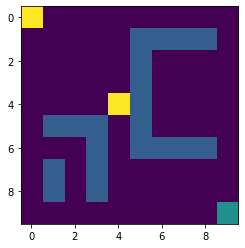

Reward: -2


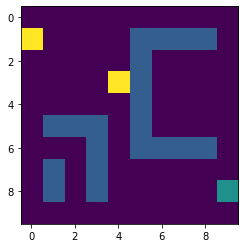

Reward: -4


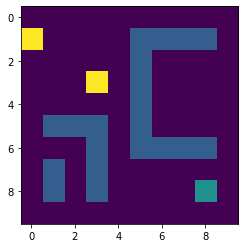

Reward: -2


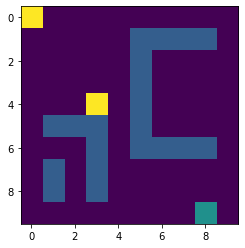

Reward: -4


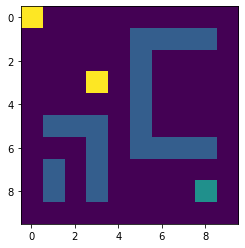

Reward: -4


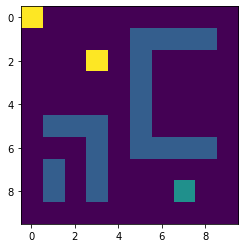

Reward: -4


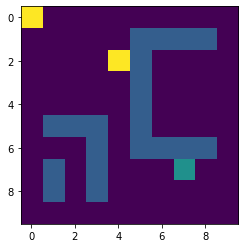

Reward: -2


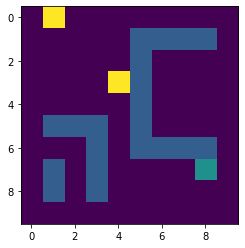

Reward: -2


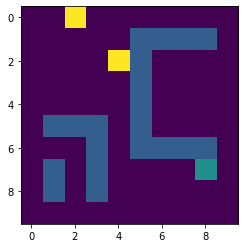

Reward: -2


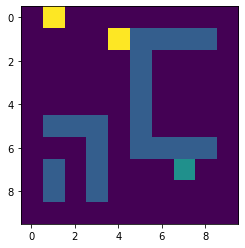

Reward: -4


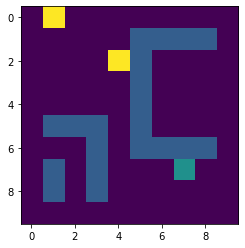

Reward: -2


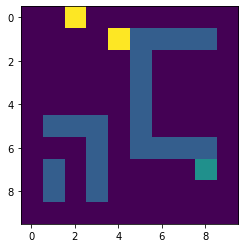

Reward: -2


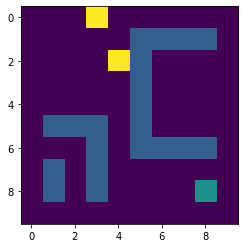

Reward: -2


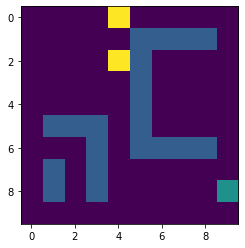

Reward: -2


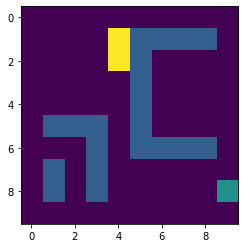

Reward: -2.5


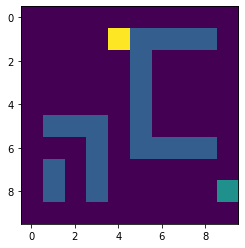

Reward: -2.5


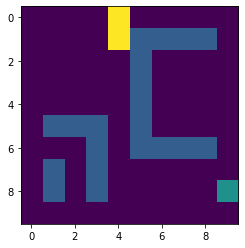

Reward: -2.5


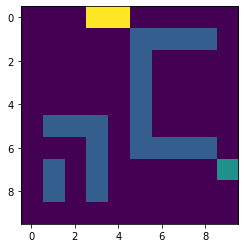

Reward: -4.5


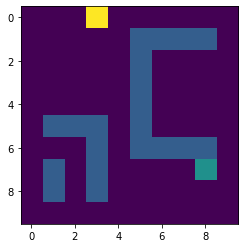

Reward: -2.5


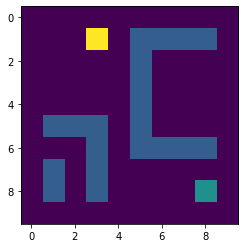

Reward: -2


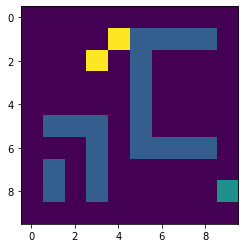

Reward: -2


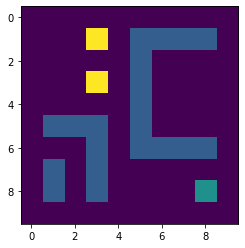

Reward: -2


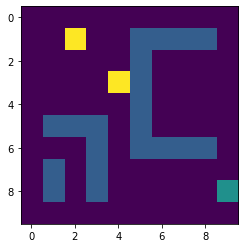

Reward: -2


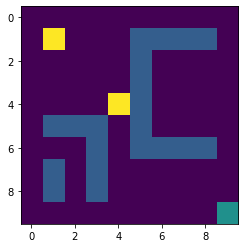

Reward: -2


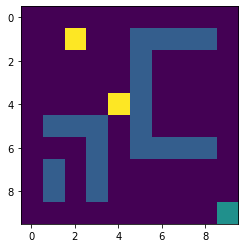

Reward: -2


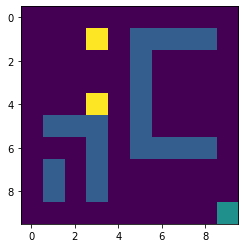

Reward: -2


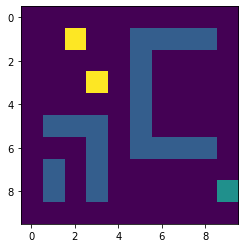

Reward: -2


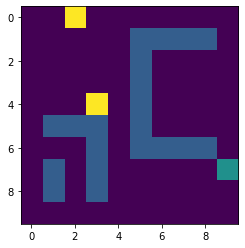

Reward: -4


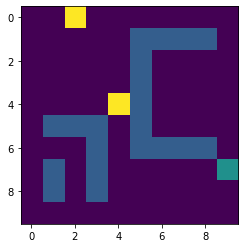

Reward: -2


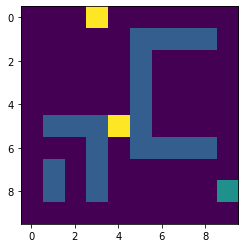

Reward: -2


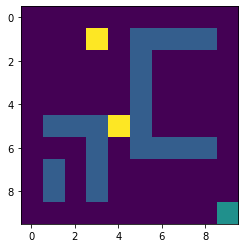

Reward: -2


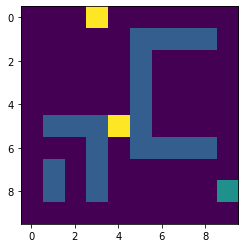

Reward: -2


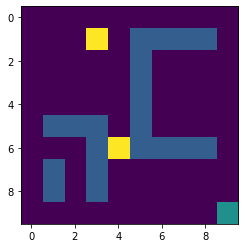

Reward: -2


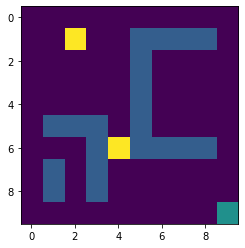

Reward: -2


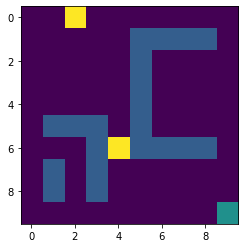

Reward: -4


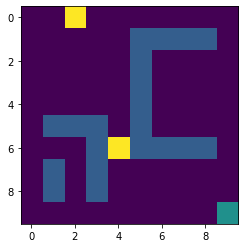

Reward: -4


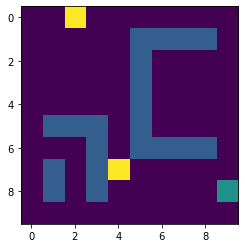

Reward: -2


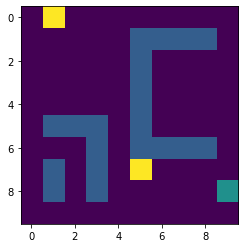

Reward: -2


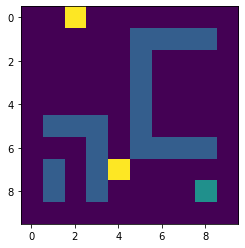

Reward: -2


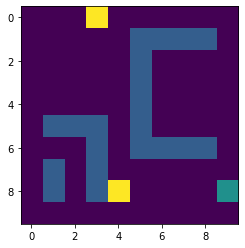

Reward: -4


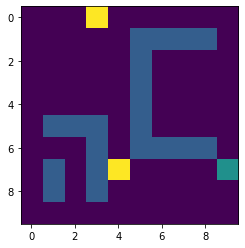

Reward: -2


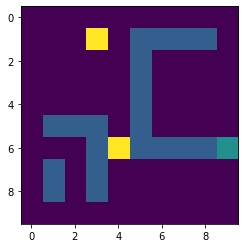

Reward: -2


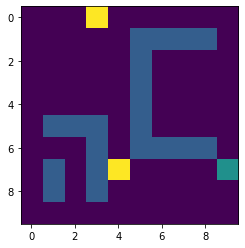

Reward: -4


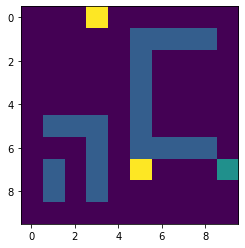

Reward: -4


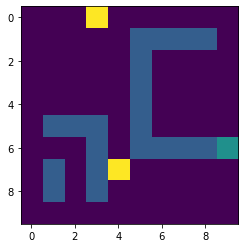

Reward: -2


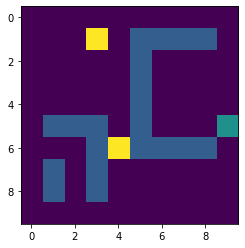

Reward: -2


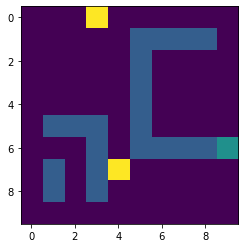

Reward: -2


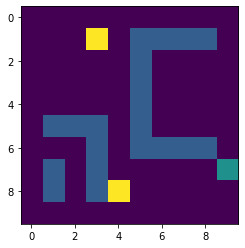

Reward: -2


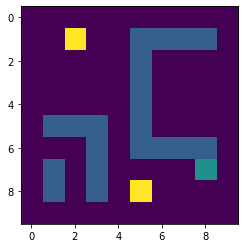

Reward: -2


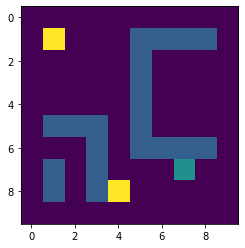

Reward: -2


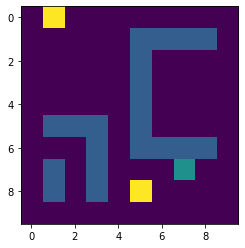

Reward: -2


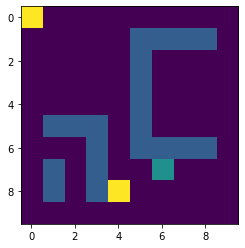

Reward: -2


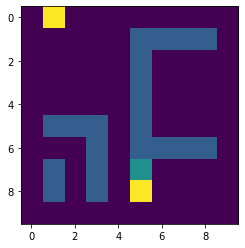

Reward: 9


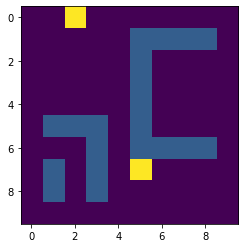

Reward: -4


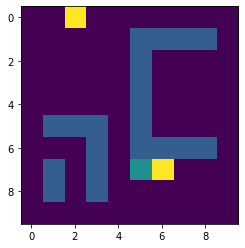

Reward: -2


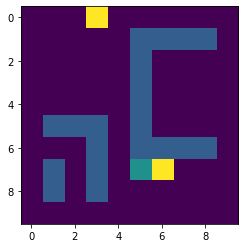

Reward: -2


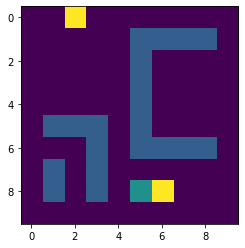

Reward: -2


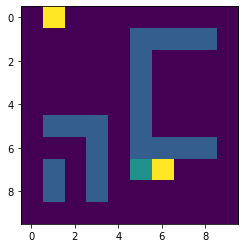

Reward: -2


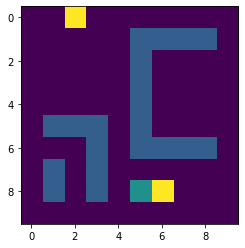

Reward: -2


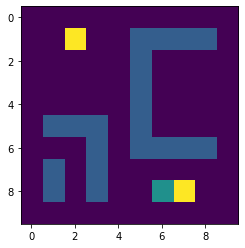

Reward: -2


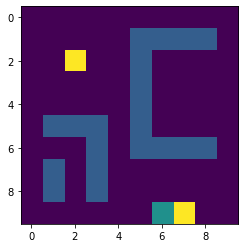

Reward: 9


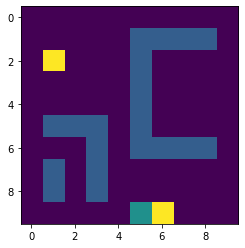

Reward: -2


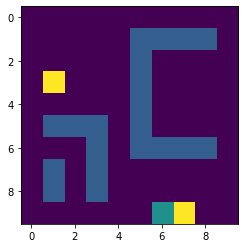

Reward: -4


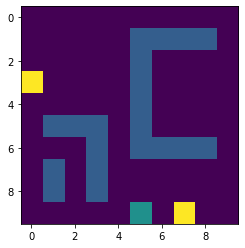

Reward: -4


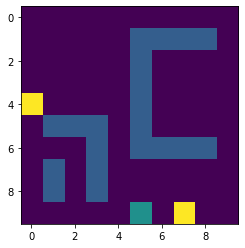

Reward: -2


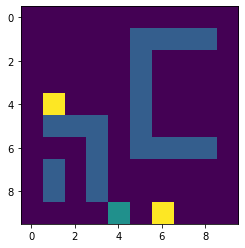

Reward: -4


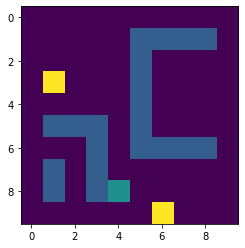

Reward: -2


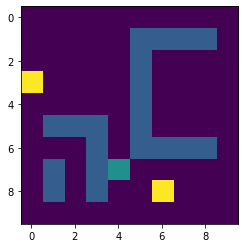

Reward: -2


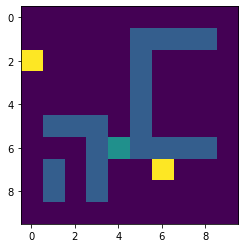

Reward: -4


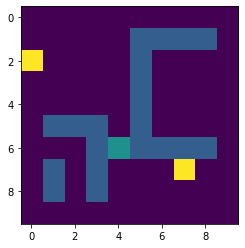

Reward: -2


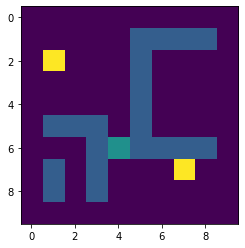

Reward: -2


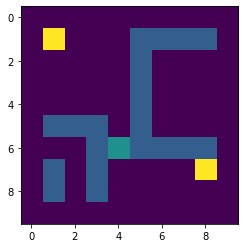

Reward: -2


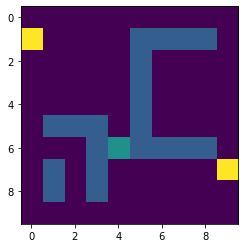

Reward: -2


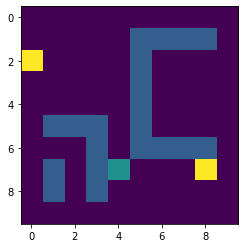

Reward: -2


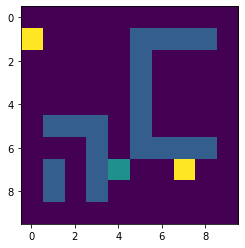

Reward: -2


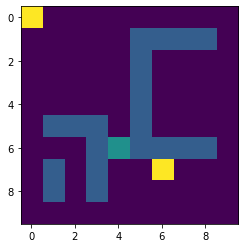

Reward: -2


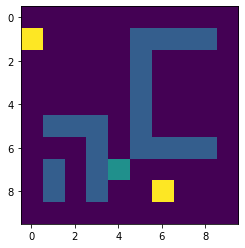

Reward: -4


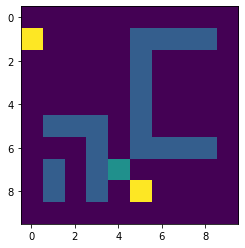

Reward: -2


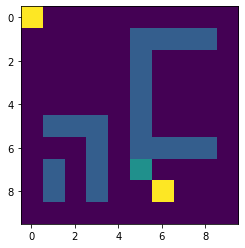

Reward: -4


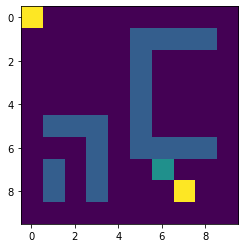

Reward: -4


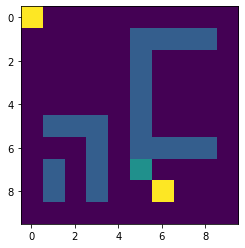

Reward: -2


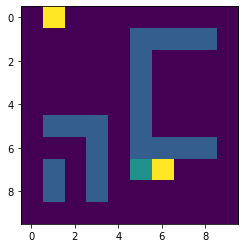

Reward: 7


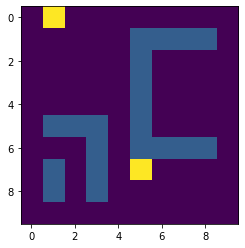

Reward: -2


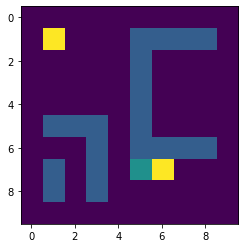

Reward: -2


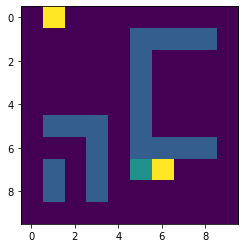

Reward: 7


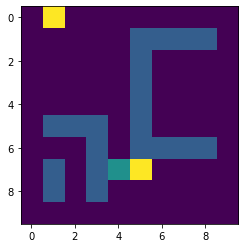

Reward: -4


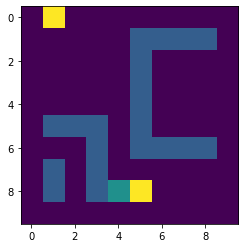

Reward: -2


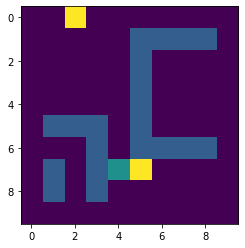

Reward: -2


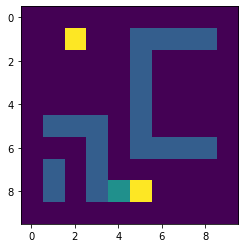

Reward: -2


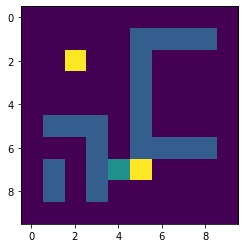

Reward: 9


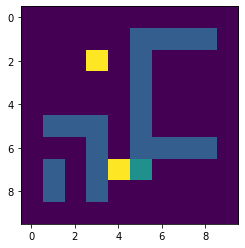

Reward: -2


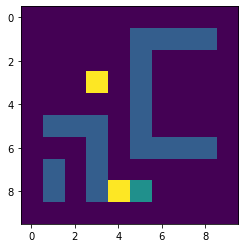

Reward: 9


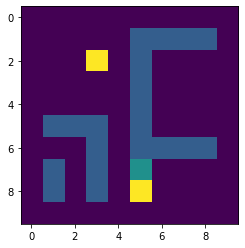

Reward: 9


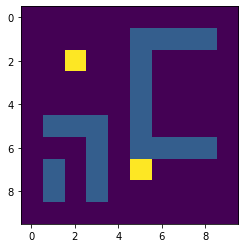

Reward: -2


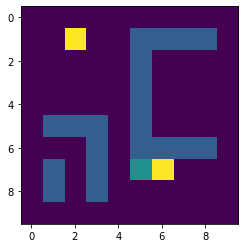

Reward: -2


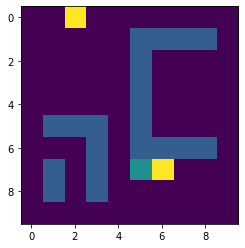

Reward: 7


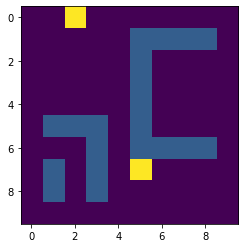

Reward: -2


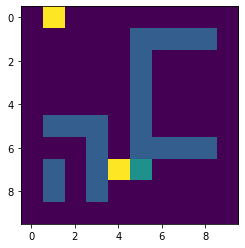

Reward: 9


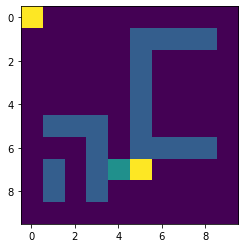

Reward: -2


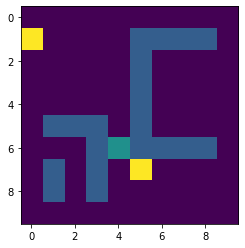

Reward: -4


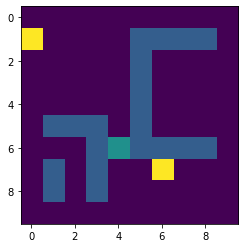

Reward: -4


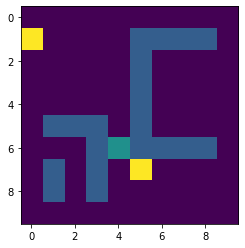

Reward: -4


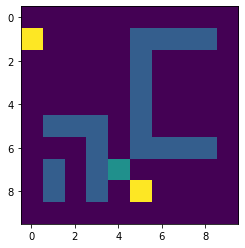

Reward: -4


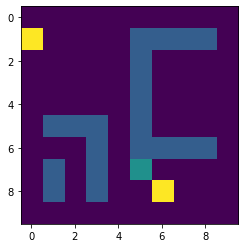

Reward: -4


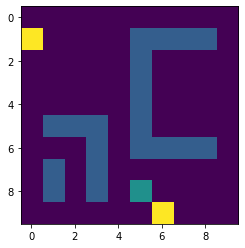

Reward: -6


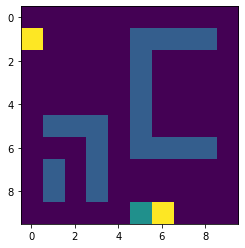

Reward: -4


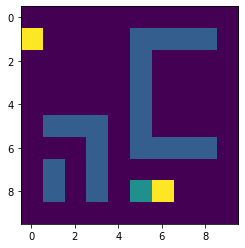

Reward: 9


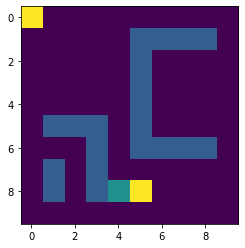

Reward: -4


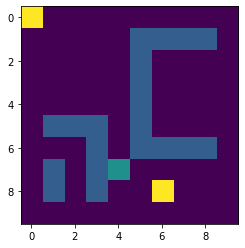

Reward: -2


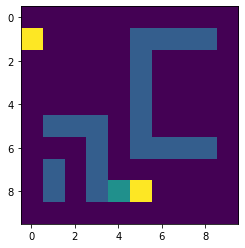

Reward: 7


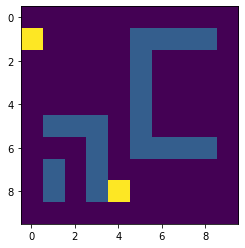

Reward: -2


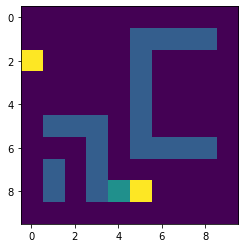

Reward: -2


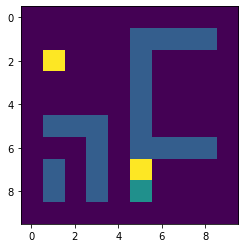

Reward: -2


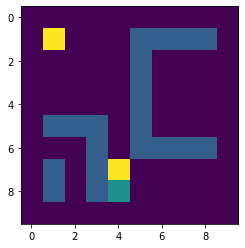

Reward: -2


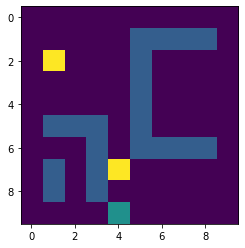

Reward: -2


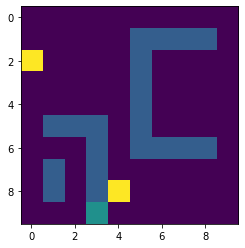

Reward: -4


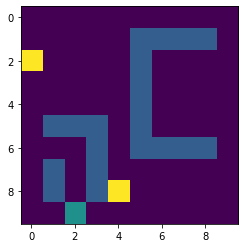

Reward: -2


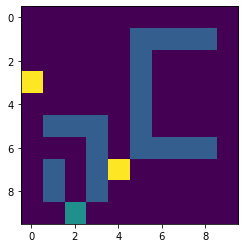

Reward: -4


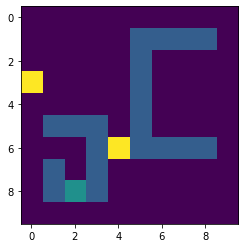

Reward: -2


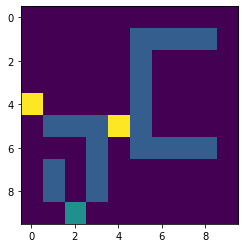

Reward: -2


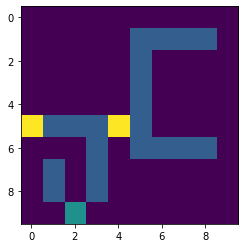

Reward: -4


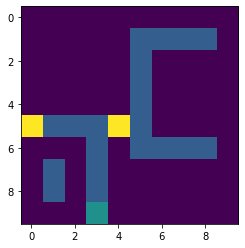

Reward: -2


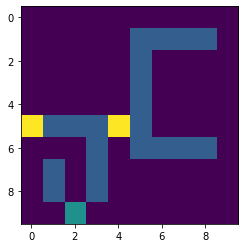

Reward: -2


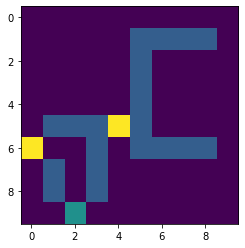

Reward: -4


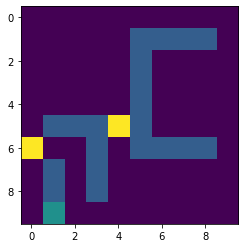

Reward: -2


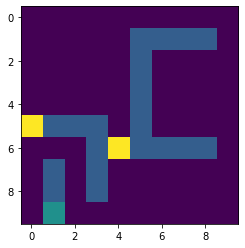

Reward: -2


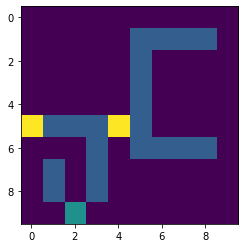

Reward: -2


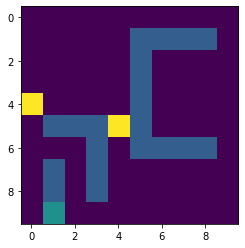

Reward: -2


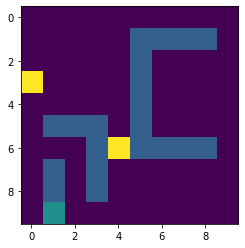

Reward: -2


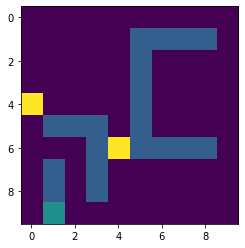

Reward: -2


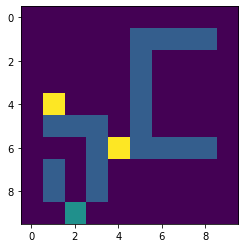

Reward: -2


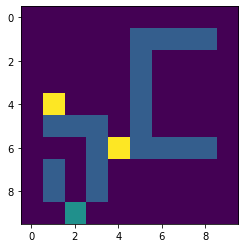

Reward: -2


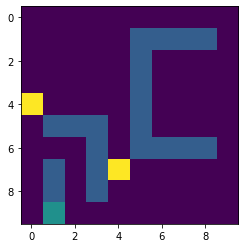

Reward: -4


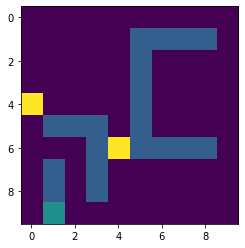

Reward: -2


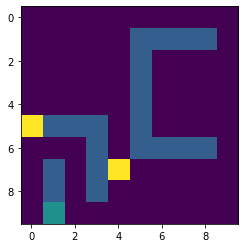

Reward: -2


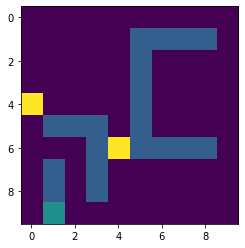

Reward: -4


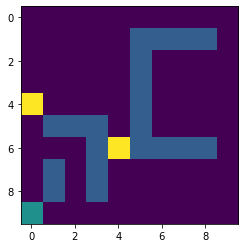

Reward: -2


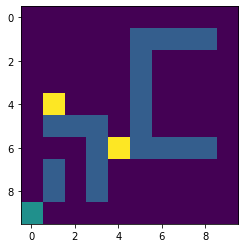

Reward: -2


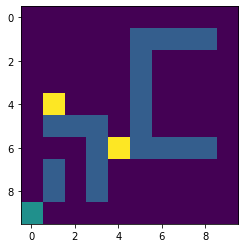

Reward: -2


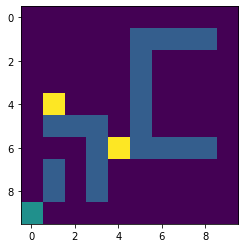

Reward: -2


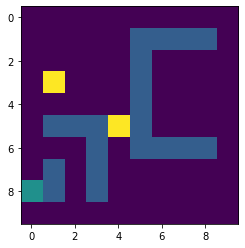

Reward: -2


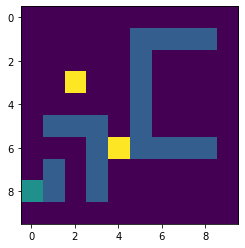

Reward: -2


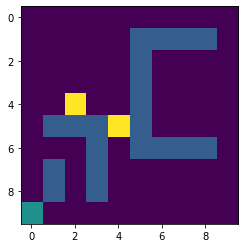

Reward: -2


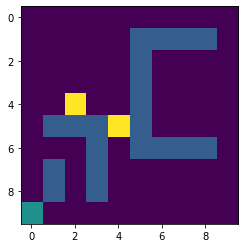

Reward: -2


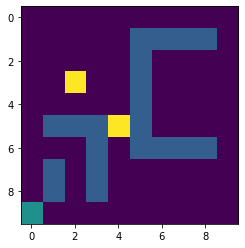

Reward: -2


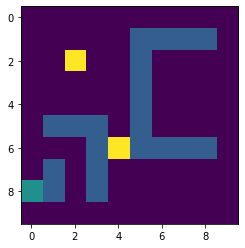

Reward: -2


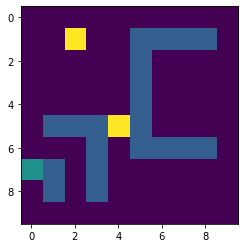

Reward: -2


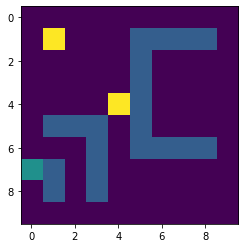

Reward: -2


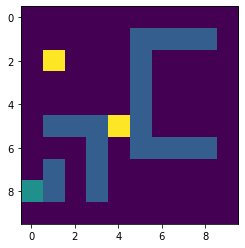

Reward: -2


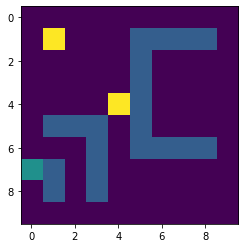

Reward: -2


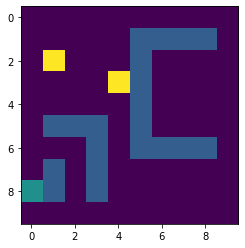

Reward: -2


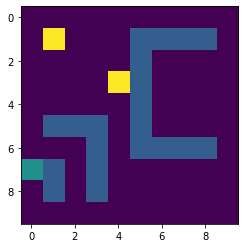

Reward: -2


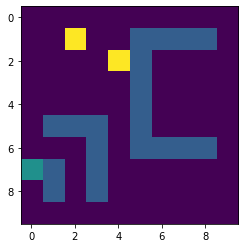

Reward: -2


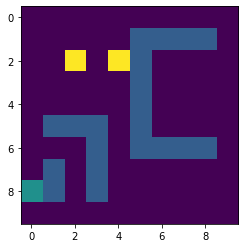

Reward: -2


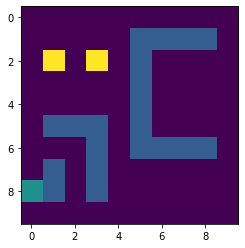

Reward: -2


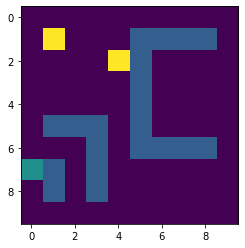

Reward: -2


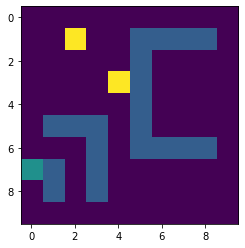

Reward: -2


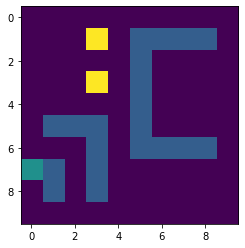

Reward: -2


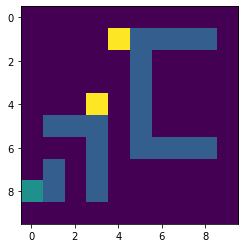

Reward: -2


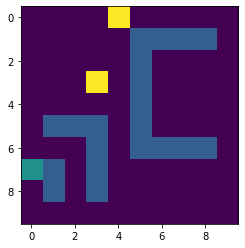

Reward: -2


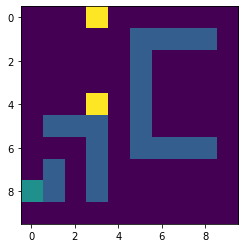

Reward: -4


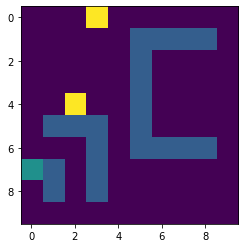

Reward: -2


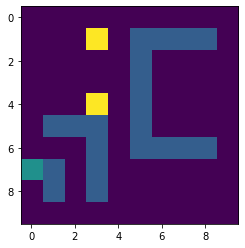

Reward: -2


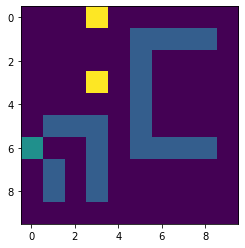

Reward: -4


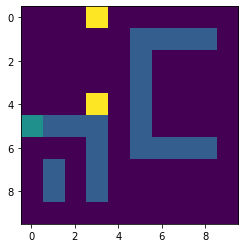

Reward: -2


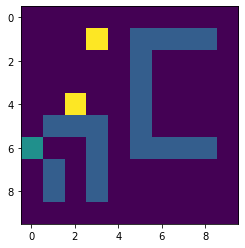

Reward: -2


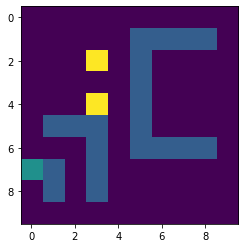

Reward: -2


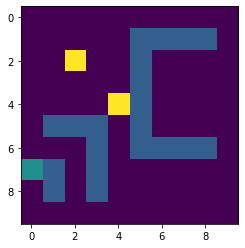

Reward: -2


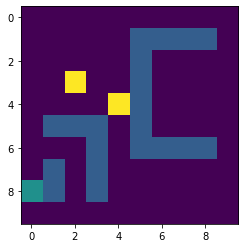

Reward: -2


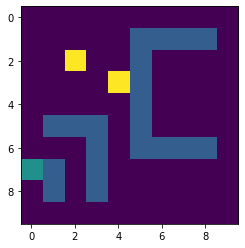

Reward: -2


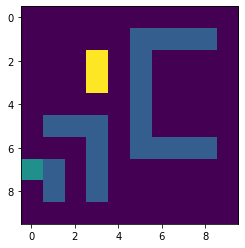

Reward: -2.5


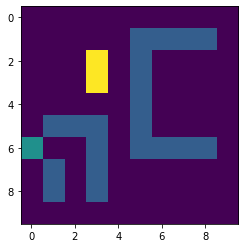

Reward: -2.5


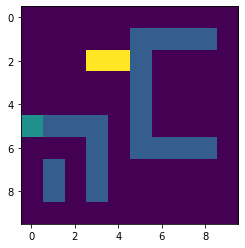

Reward: -2


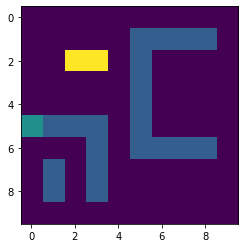

Reward: -2


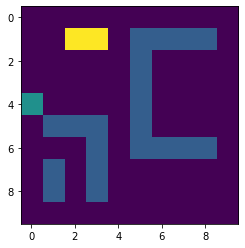

Reward: -2


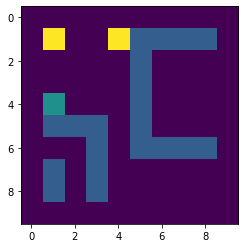

Reward: -2


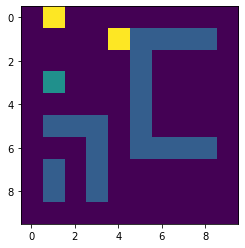

Reward: -2


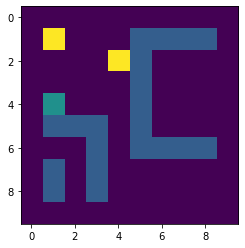

Reward: -2


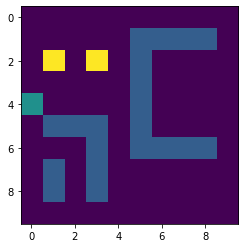

Reward: -2


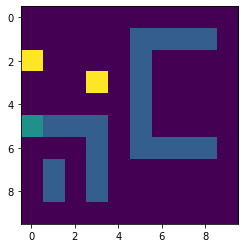

Reward: -2


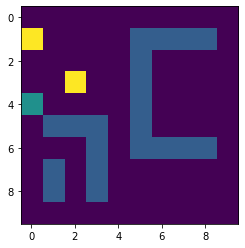

Reward: -4


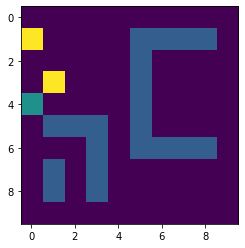

Reward: -2


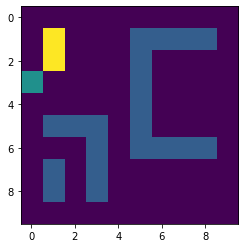

Reward: -2


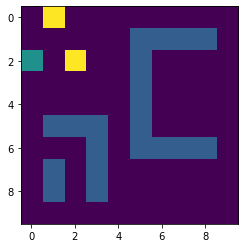

Reward: -2


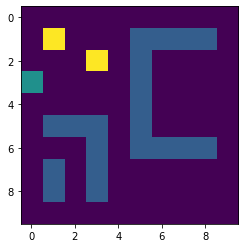

Reward: -2


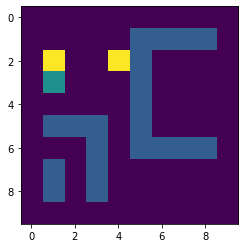

Reward: 9


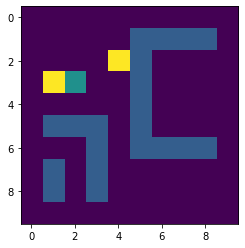

Reward: 9


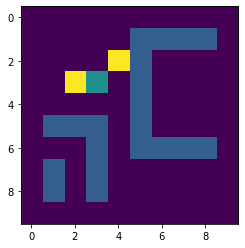

Reward: -2


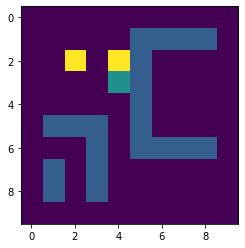

Reward: -2.5


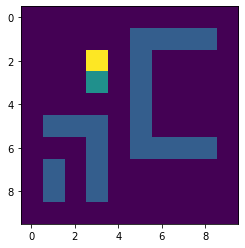

Reward: 9


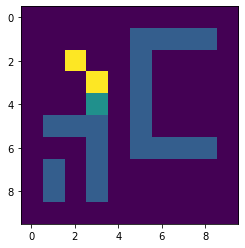

Reward: -2


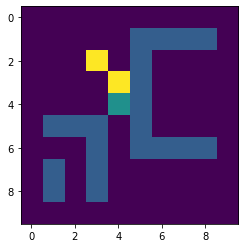

Reward: -2


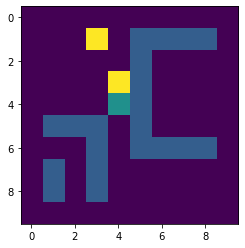

Reward: 9


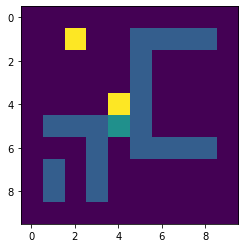

Reward: -2


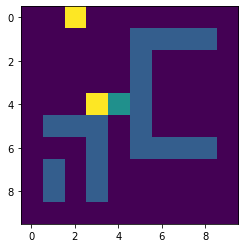

Reward: -2


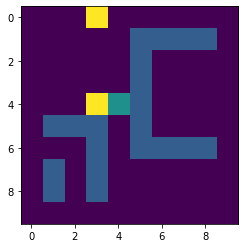

Reward: -2


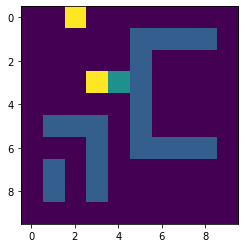

Reward: 9


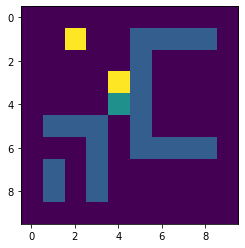

Reward: -2


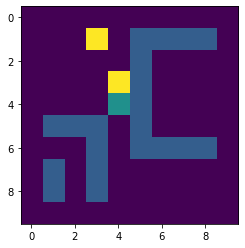

Reward: -2


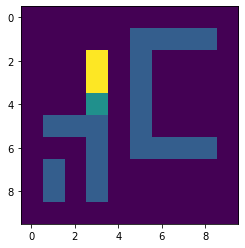

Reward: 9


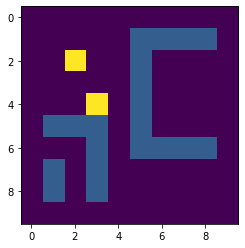

Box(9,)


In [ ]:
env = GridStochasticEnvironment(isDQN=True)
state  = env.reset()
done = False
env.render()
plt.show()
while not done:
    action = [env.action_space.sample() for i in range(2)]
    #action = env.action_space.sample()
    observation, reward, done, _ = env.step(action)
    #print ('Obs: ', observation)
    print('Reward:', reward)
    env.render()
    #print (observation)
    plt.show()
print (env.observation_space)

#PART 1: DQN

In [3]:
def model(input_shape, num_classes):
  weights = initializers.RandomNormal(stddev=0.01)
  model = Sequential()
  model.add(Conv2D(28, (3, 3), kernel_initializer=weights, activation='relu', input_shape=input_shape))
  model.add(MaxPool2D(2, 2))
  model.add(Conv2D(56, (3, 3), kernel_initializer=weights, activation='relu'))
  model.add(MaxPool2D(2, 2))
  model.add(Flatten())
  model.add(Dense(units=256, kernel_initializer=weights, activation='relu'))
  model.add(Dense(units=128, kernel_initializer=weights,activation='relu'))
  model.add(Dense(units=16, activation='softmax'))
  model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['accuracy'])

  model.summary()
  return model

def init_zeros(dim):
  a = np.zeros((BATCH_SIZE, dim))
  b = np.zeros((BATCH_SIZE, dim))
  return a, b

class Dqn_Agent:
  def __init__(self, env, gamma, total_classes):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
    self.gamma = gamma
    self.replay_memory = deque(maxlen=N)
    self.count = 0
    self.total_classes = total_classes
    self.main_network = model((10, 10, 1), self.total_classes)
    self.target_network = model((10, 10, 1), self.total_classes)
    self.init_weights()
  
  def init_weights(self):
    self.target_network.set_weights(self.main_network.get_weights())
  
  def replay(self, done):
    if len(self.replay_memory) < MIN_REPLAY_SIZE:
      return
    minibatch_transitions = random.sample(self.replay_memory, BATCH_SIZE)
    #states, next_states = init_zeros(self.observation_space.shape[0])
    states =  np.array([transition[0] for transition in minibatch_transitions])
    next_states = np.array([transition[3] for transition in minibatch_transitions])

    #print (states.shape, next_states.shape)

    states_qs = self.main_network.predict(states)
    next_states_qs = self.target_network.predict(next_states)

    self.count = self.count + 1 if done else self.count
    if self.count >= UPDATE_MIN:
      self.count = 0
      #print('Here')
      self.init_weights()
    
    for index, transition in enumerate(minibatch_transitions):
      #state, action, reward, new_state, done
      states_qs[index][transition[1]] = transition[2] if transition[4] else (transition[2] + self.gamma * (np.max(next_states_qs[index])))
    
    #print (states.shape, states_qs.shape)
     
    self.main_network.fit(states, states_qs, batch_size=BATCH_SIZE, verbose=0, shuffle=False, epochs=1)

##Training and testing DQN on our environment

In [4]:
def train_agent(env, agent, epsilon, total_actions):
  total_rewards, epsilons, timesteps = [], [], []
  dim = env.observation_space.shape[0]
  eps1 = epsilon * DECAY
  
  for episode in range(EPISODES):
    state = env.reset()
    done, current_rewards, timestep = False, 0, 0
    while not done:
      state = np.reshape(state, (10, 10, 1))
      if np.random.uniform(0, 1) < epsilon:
        action = np.random.randint(total_actions)
      else:
        action = np.argmax(agent.main_network.predict(state.reshape(-1, *state.shape))[0])
      
      action1 = all_actions[action]
      next_state, reward, done, _ = env.step(action1)
      next_state = np.reshape(next_state, (10, 10, 1))
      current_rewards += reward
      timestep += 1
      if done and timestep < env.max_timesteps:
        reward += 100
        #print ('here')
      agent.replay_memory.append((state, action, reward, next_state, done))
      state = next_state
      agent.replay(done)
    if episode % 25 == 0:
      print(f'Episode: {episode}, Reward: {current_rewards}, Timesteps: {timestep}, Epsilon: {epsilon}')
    timesteps.append(timestep)
    total_rewards.append(current_rewards)
    tmp = np.exp(-1 * eps1 * episode)
    epsilons.append(tmp)
    epsilon = tmp    

  return agent, epsilons, total_rewards, timesteps

def test1(env, agent):
  state = env.reset()
  env.render()
  plt.show()
  done = False
  current_rewards = 0
  while not done:
    env.render()
    state = np.reshape(state, (10, 10, 1))
    #print (state.shape)
    action = np.argmax(agent.main_network.predict(state.reshape(-1, *state.shape))[0])
    action1 = all_actions[action]
    next_state, reward, done, _ = env.step(action1)
    next_state = np.reshape(next_state, (10, 10, 1))
    state = next_state.copy()
    current_rewards += 1
    env.render()
    plt.show()

  print(f'Reward: {current_rewards}')


In [5]:
epsilon, DECAY, EPS_MIN = 1, 0.0005, 0.001
UPDATE_MIN = 2000
GAMMA = 0.99
BATCH_SIZE = 64
MIN_REPLAY_SIZE, N = 1000, 50000
EPISODES = 6000
total_actions = 16
dim  = (10, 10, 1)
all_actions = {x: [x // 4, x % 4] for x in range(total_actions)}

In [ ]:
env1 = GridStochasticEnvironment(gym.Env)
agent = Dqn_Agent(env1, GAMMA, total_actions)

#Train
agent, epsilons, total_rewards, timesteps = train_agent(env1, agent, epsilon, total_actions)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 28)          280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 28)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 56)          14168     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 56)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 56)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               14592     
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

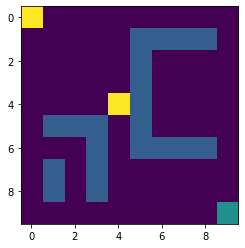

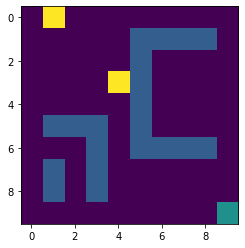

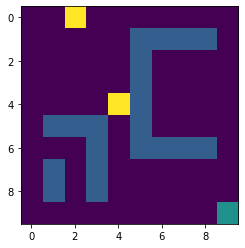

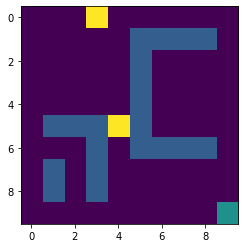

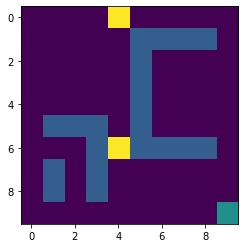

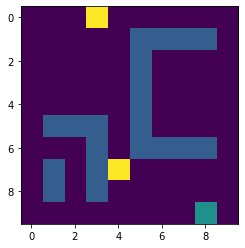

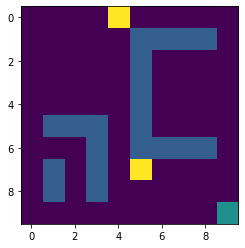

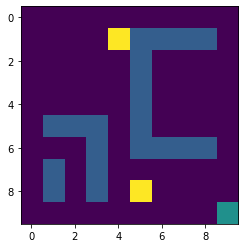

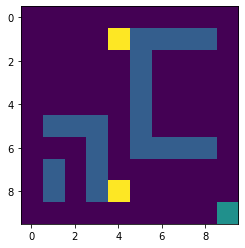

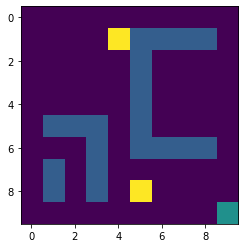

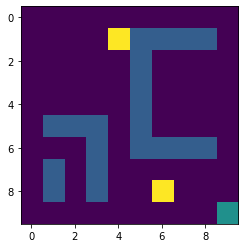

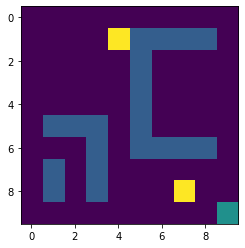

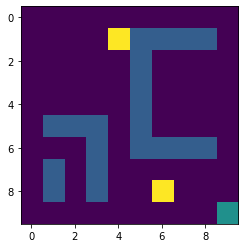

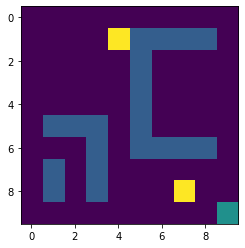

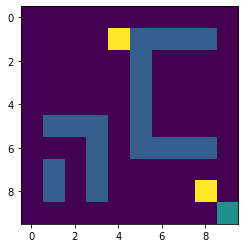

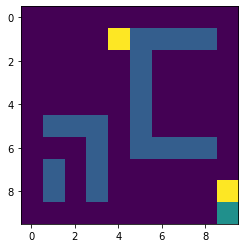

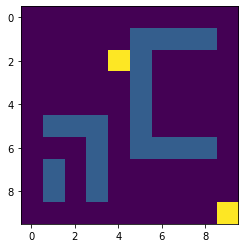

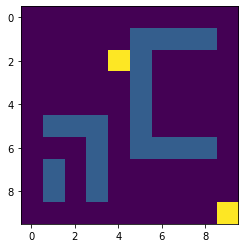

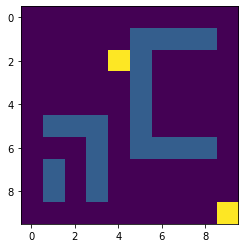

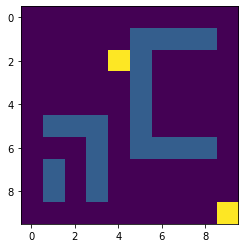

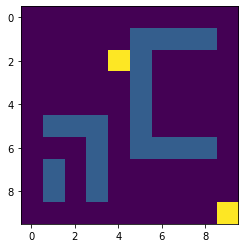

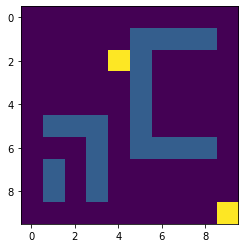

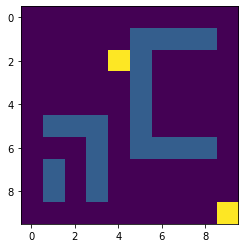

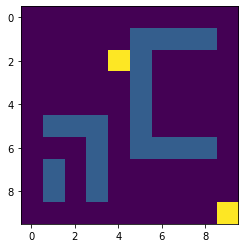

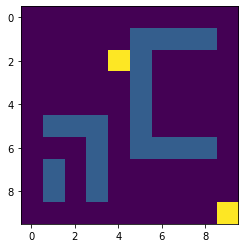

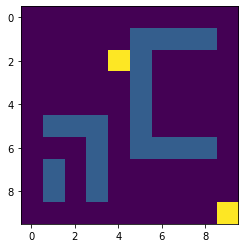

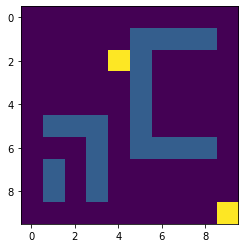

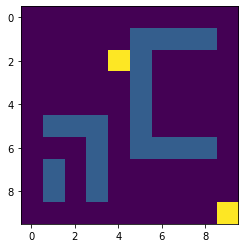

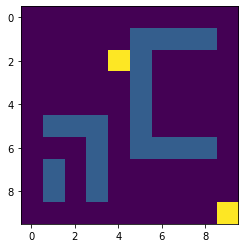

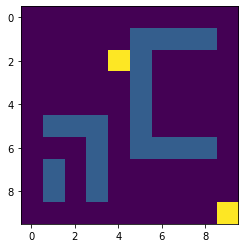

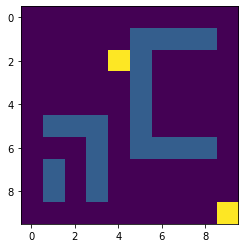

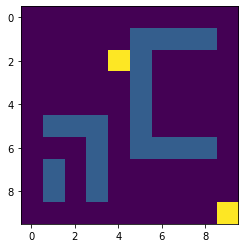

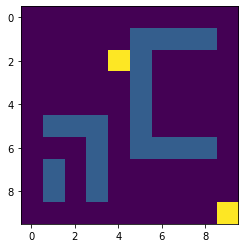

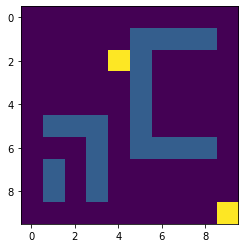

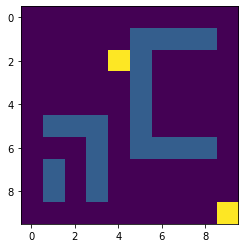

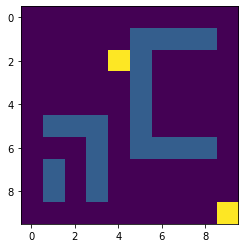

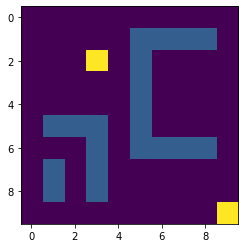

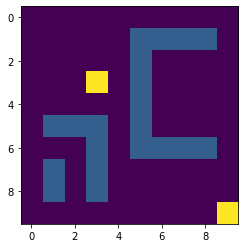

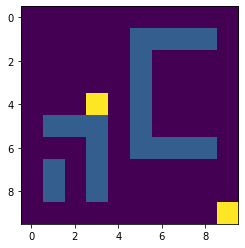

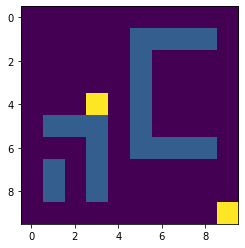

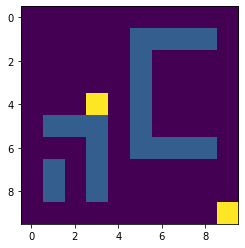

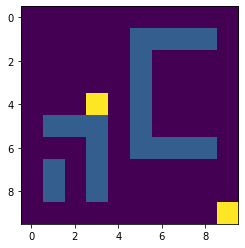

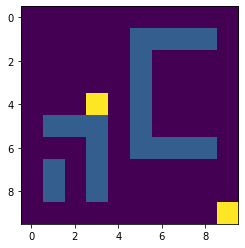

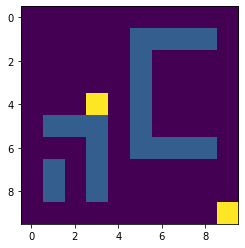

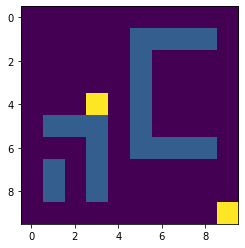

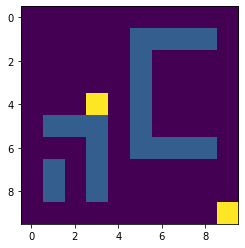

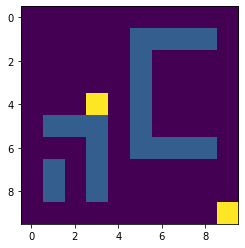

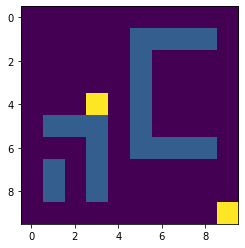

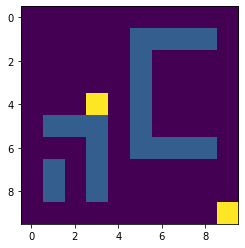

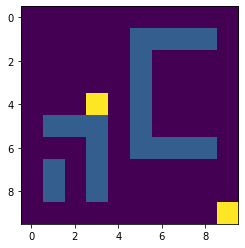

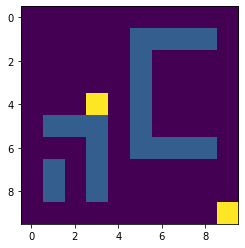

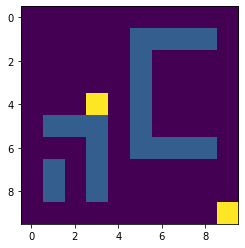

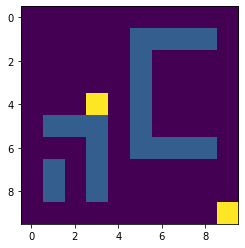

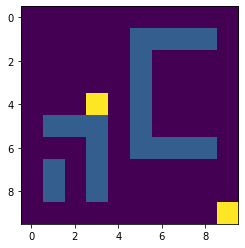

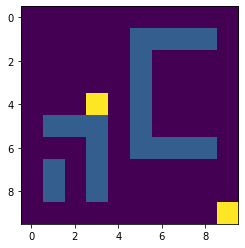

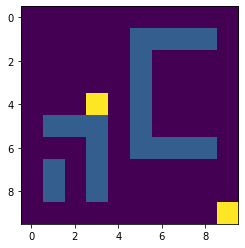

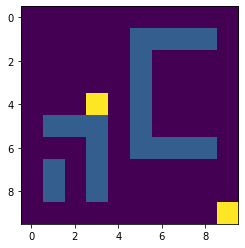

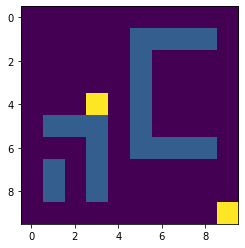

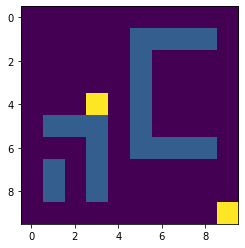

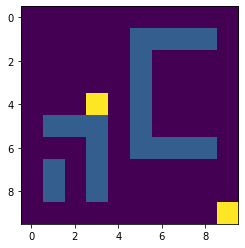

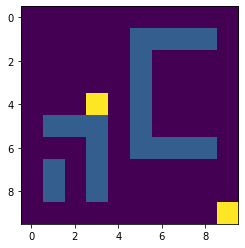

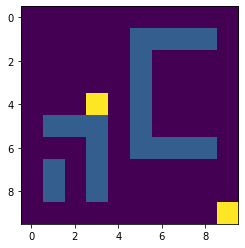

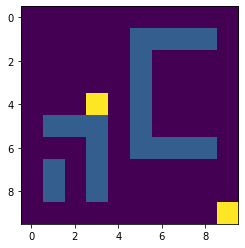

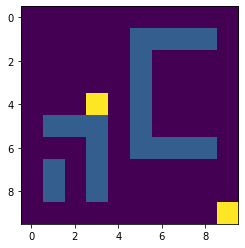

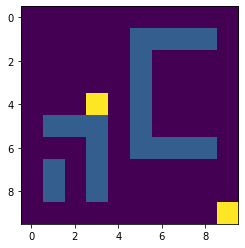

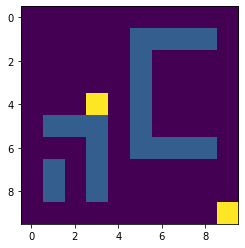

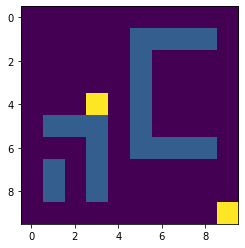

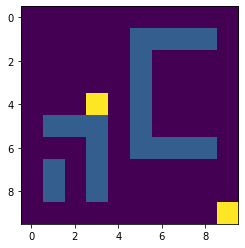

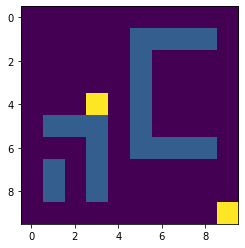

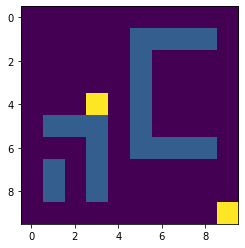

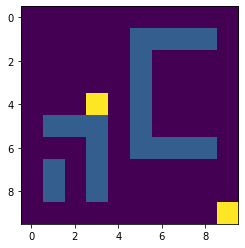

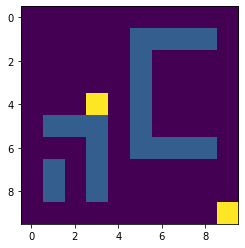

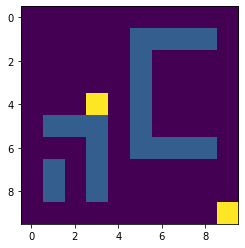

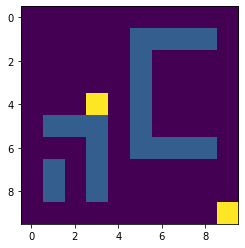

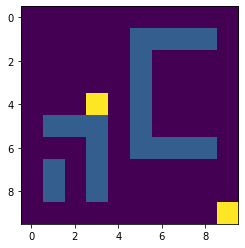

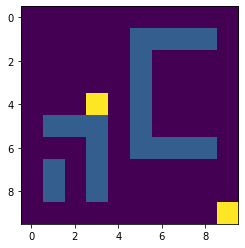

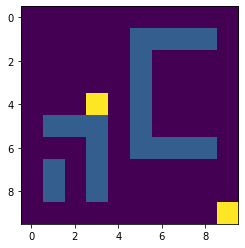

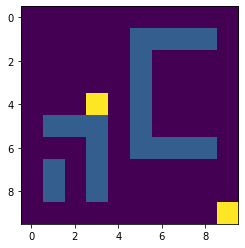

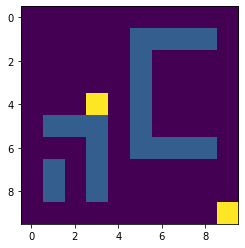

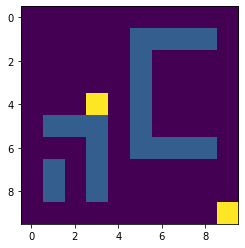

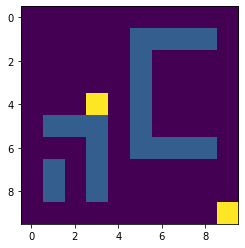

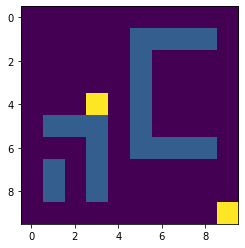

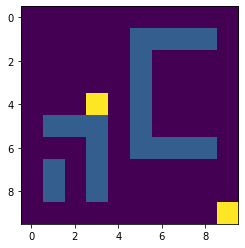

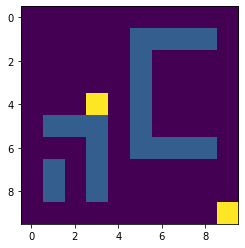

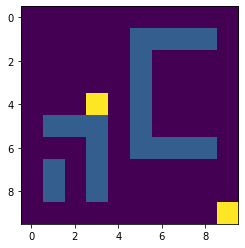

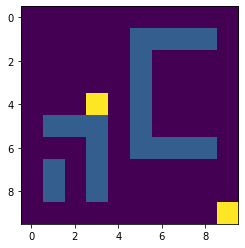

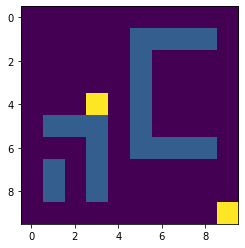

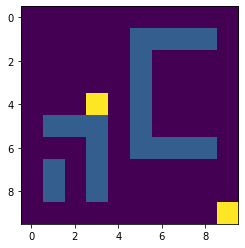

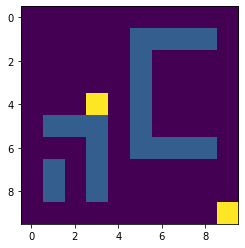

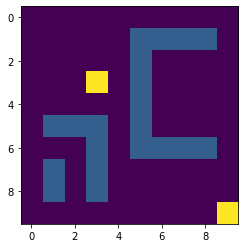

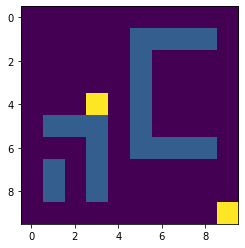

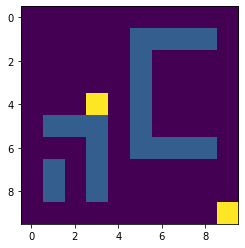

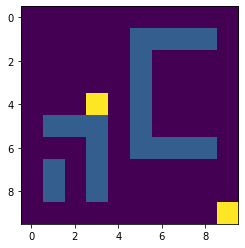

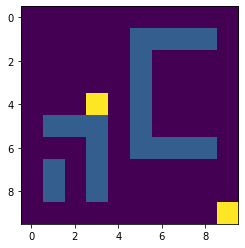

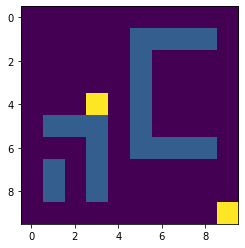

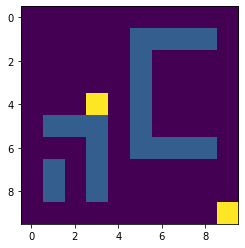

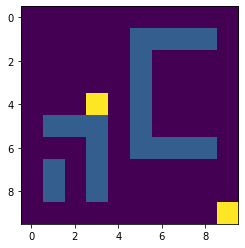

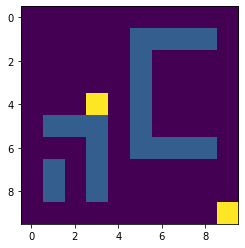

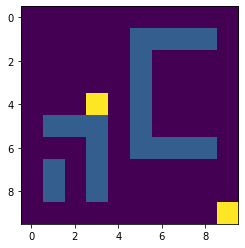

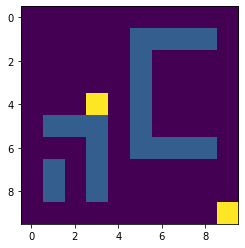

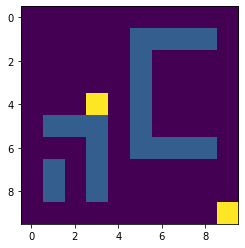

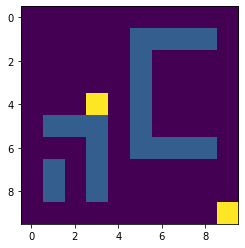

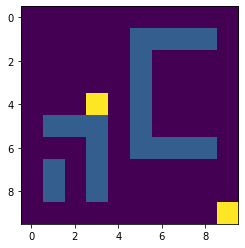

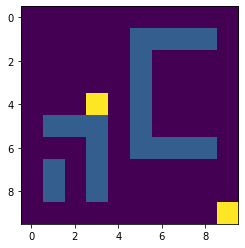

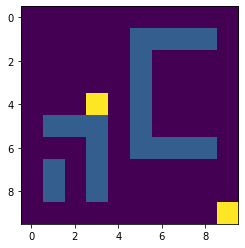

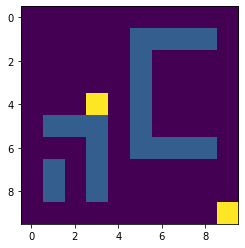

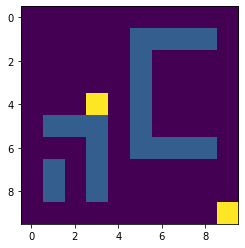

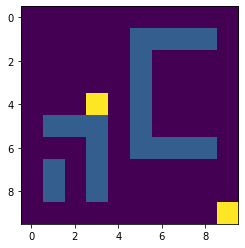

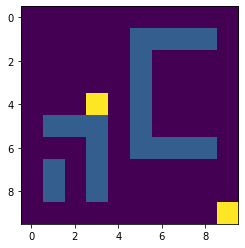

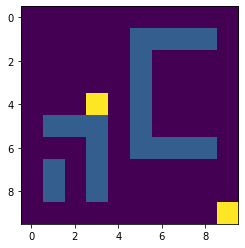

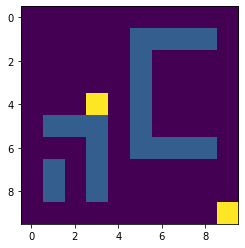

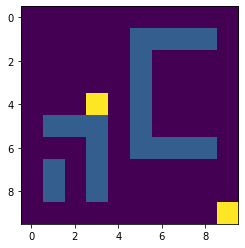

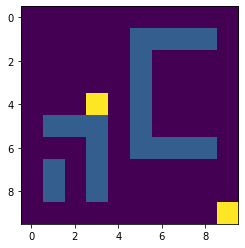

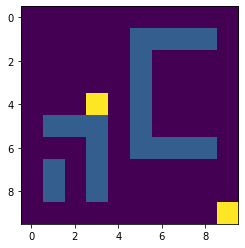

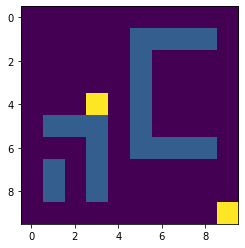

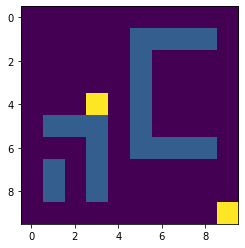

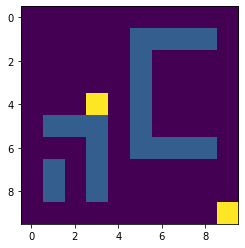

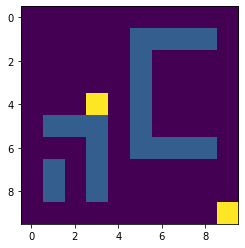

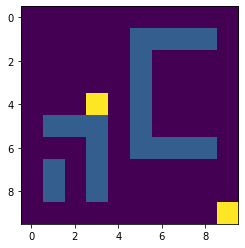

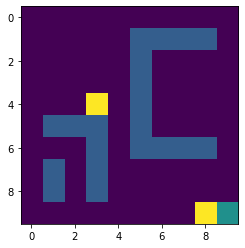

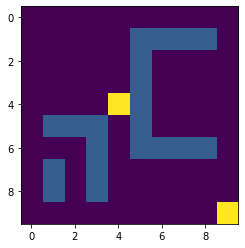

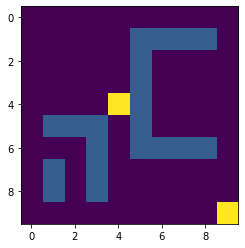

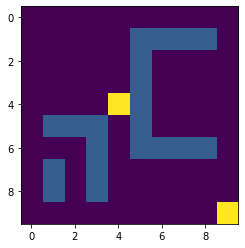

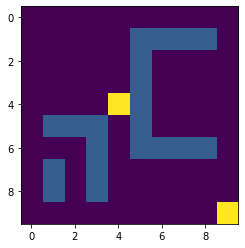

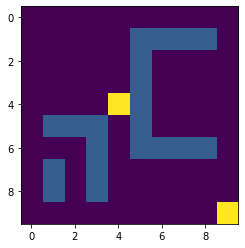

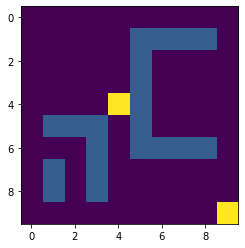

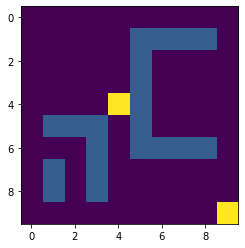

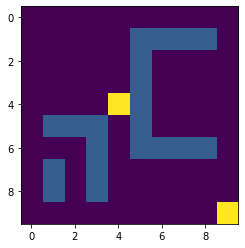

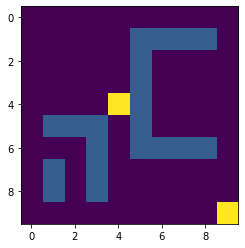

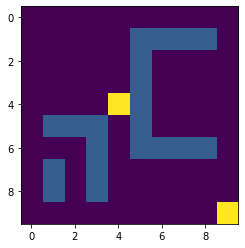

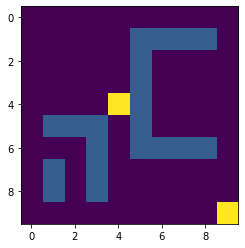

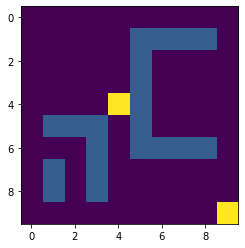

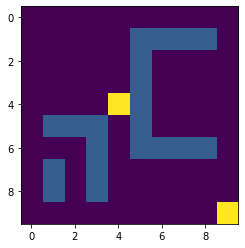

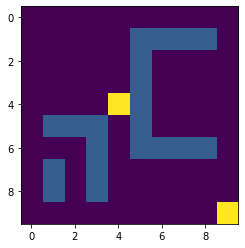

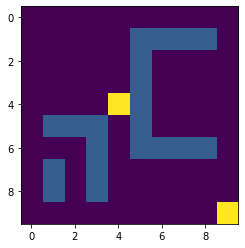

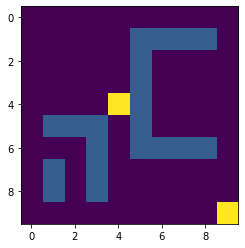

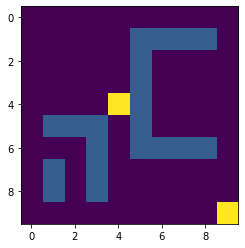

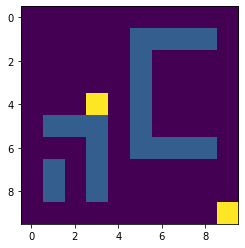

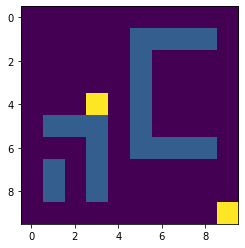

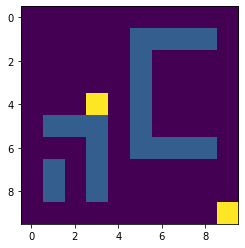

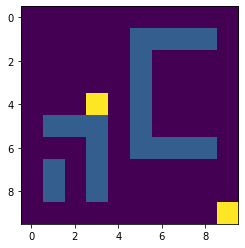

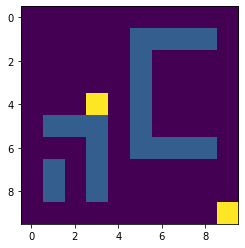

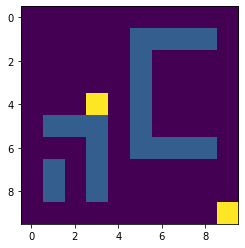

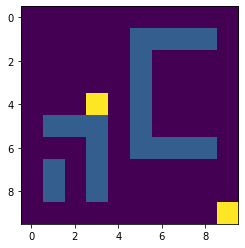

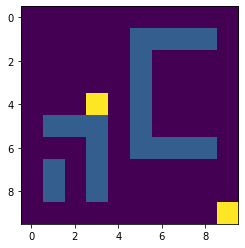

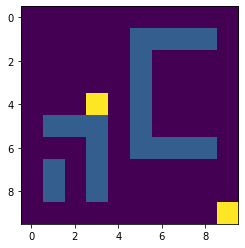

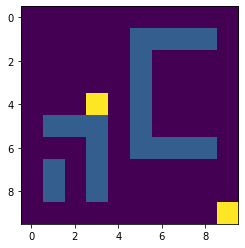

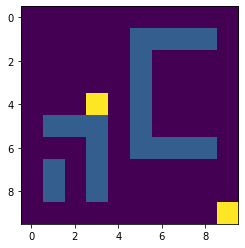

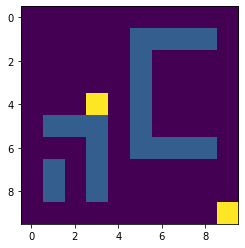

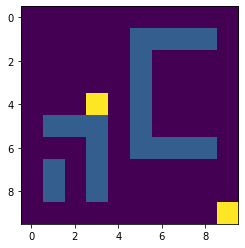

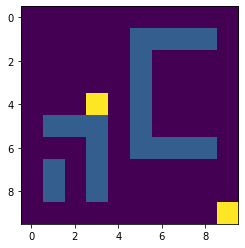

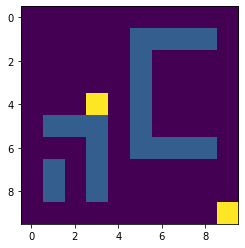

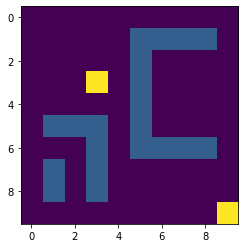

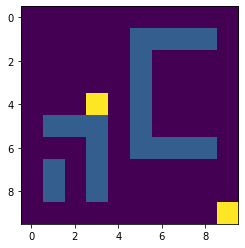

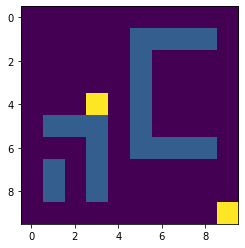

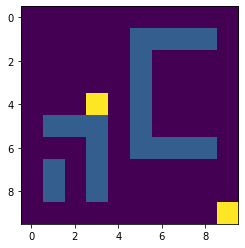

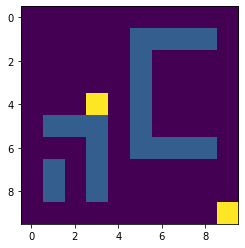

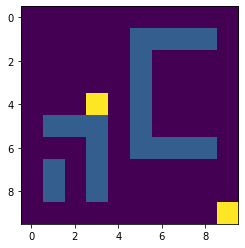

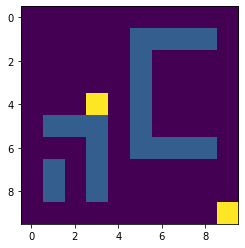

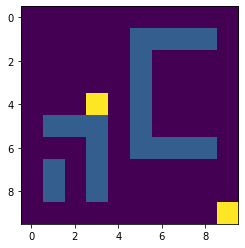

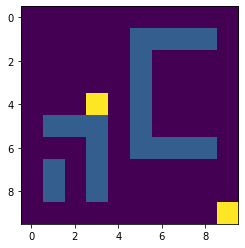

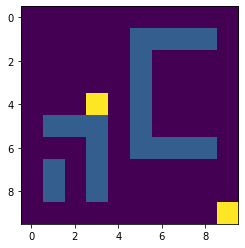

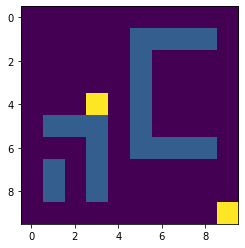

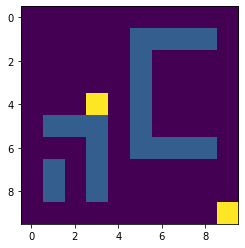

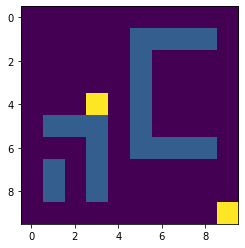

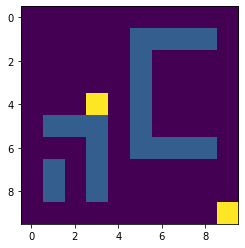

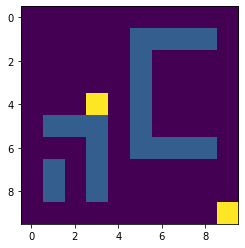

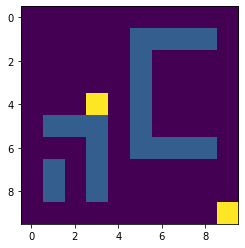

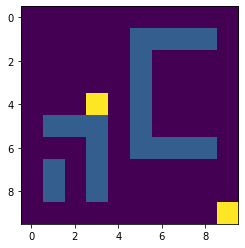

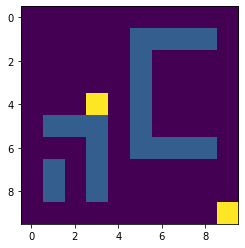

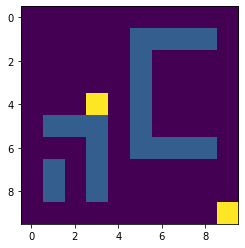

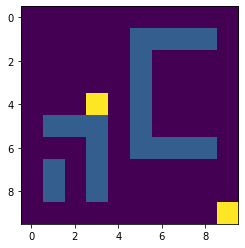

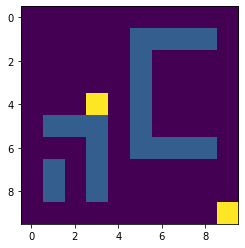

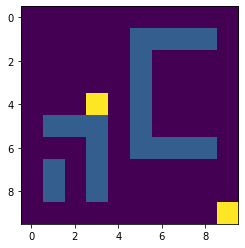

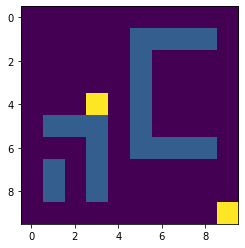

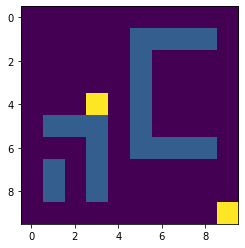

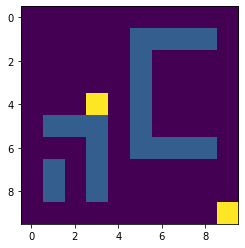

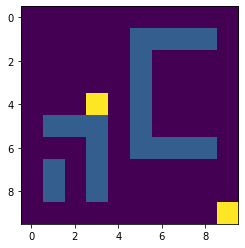

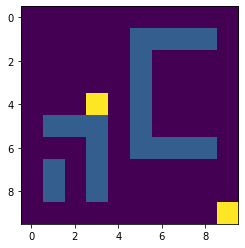

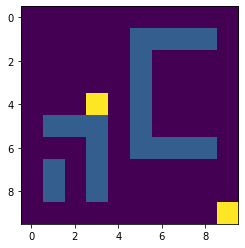

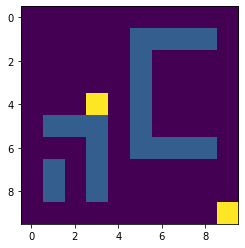

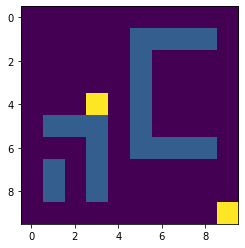

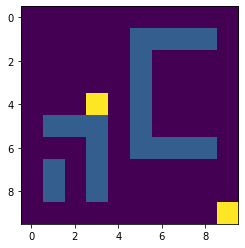

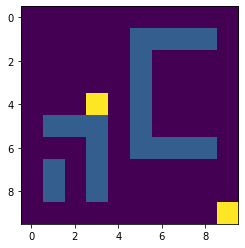

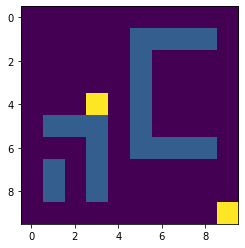

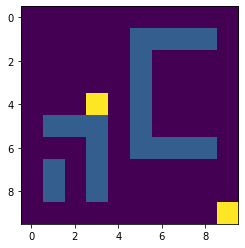

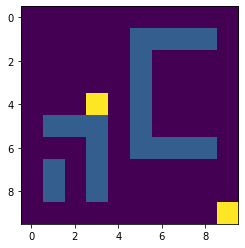

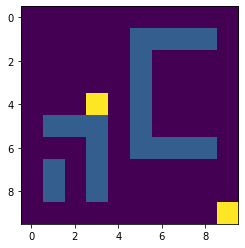

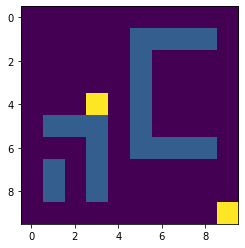

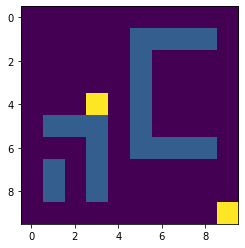

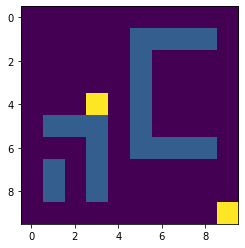

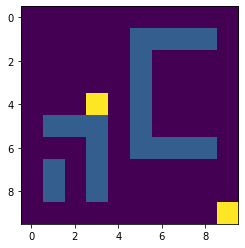

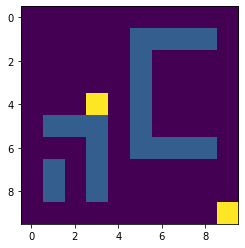

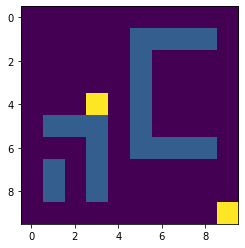

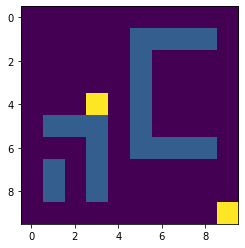

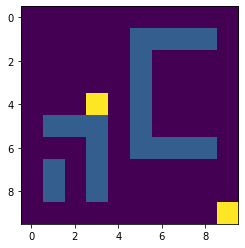

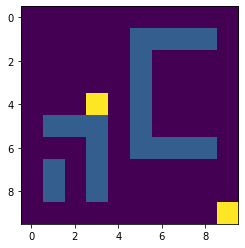

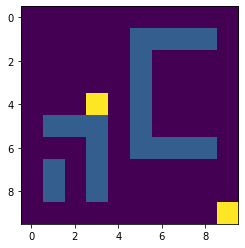

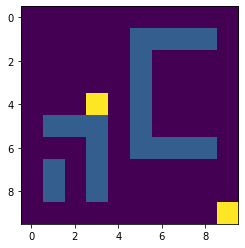

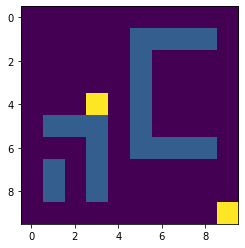

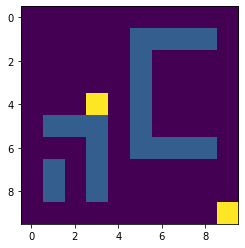

Reward: 200


In [ ]:
#Test
env2 = GridStochasticEnvironment(gym.Env)
test1(env2, agent)

##Plot

In [6]:
def plotEpsilon(epsilons):
  plt.plot(epsilons)
  plt.xlabel('Episode')
  plt.ylabel('Epsilon')
  plt.show()

def plotRewards(total_rewards):
  plt.plot(total_rewards)
  plt.xlabel('Episode')
  plt.ylabel('Total Reward (per episode)')
  plt.show()

def plot1(epsilons, total_rewards):
  plt.plot(epsilons, total_rewards)
  plt.xlabel('Epsilon')
  plt.ylabel('Total Reward (per episode)')
  plt.show()

def plotTimesteps(timesteps):
  plt.plot(timesteps)
  plt.xlabel('Episode')
  plt.ylabel('Timesteps')
  plt.show()
  
def plotAverageReward(total_rewards):
  plt.xlabel('Episode')
  plt.ylabel('Total Reward (Average reward in 10 episodes)')
  plt.plot([np.mean(total_rewards[tr:tr+10]) for tr in range(10, len(total_rewards))])
  plt.show()

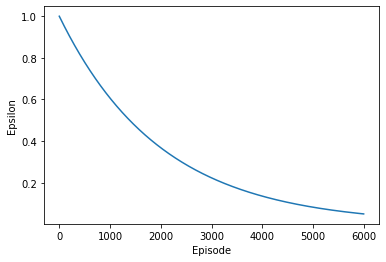

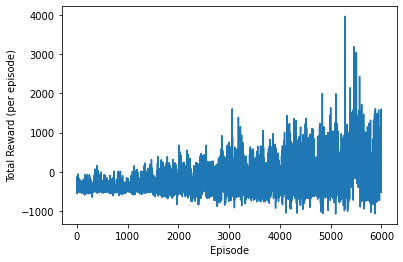

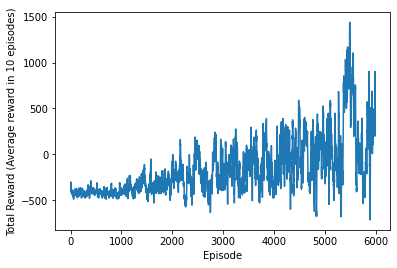

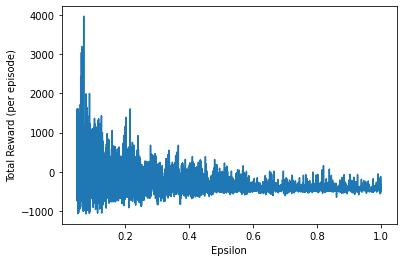

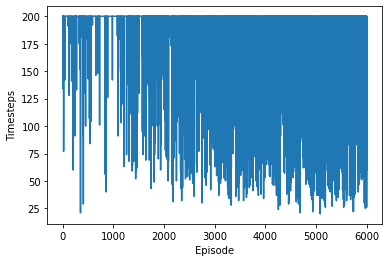

In [ ]:
plotEpsilon(epsilons)
plotRewards(total_rewards)
plotAverageReward(total_rewards)
plot1(epsilons, total_rewards)
plotTimesteps(timesteps)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pickle
data = []
data.append(total_rewards)
output = open('data21.pkl', 'wb')
pickle.dump(data,output)

#Double DQN

In [7]:
TAU = 0.75

In [8]:
class Double_DQN_Agent:
  def __init__(self, env, gamma, total_actions):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
    self.gamma = gamma
    self.total_actions = total_actions
    self.replay_memory = deque(maxlen=N)
    self.main_network = model(dim, self.total_actions)
    self.target_network = model(dim, self.total_actions)
      
  def init_weights(self):
    self.target_network.set_weights(self.main_network.get_weights())
  
  def update_weights(self):
    #TAU * (THETA) + (1 - TAU)*(THETA`)
    theta = np.array(self.main_network.get_weights())
    theta_prime = np.array(self.target_network.get_weights())
    self.target_network.set_weights(TAU * theta + (1 - TAU) * theta_prime)
    #print('Here')

  def replay(self, done):
    if len(self.replay_memory) < MIN_REPLAY_SIZE:
      return
    minibatch_transitions = random.sample(self.replay_memory, BATCH_SIZE)
    states =  np.array([transition[0] for transition in minibatch_transitions])
    next_states = np.array([transition[3] for transition in minibatch_transitions])
      
    #print (states.shape, next_states.shape)

    states_qs = self.main_network.predict(states)
    next_states_qs_main = self.main_network.predict(next_states)
    next_states_qs_future = self.target_network.predict(next_states)
    
    for index, transition in enumerate(minibatch_transitions):
      #state, action, reward, new_state, done
      states_qs[index][transition[1]] = transition[2] if transition[4] else transition[2] + self.gamma * (next_states_qs_future[index][np.argmax(next_states_qs_main[index])])
    
    #print (states.shape, states_qs.shape)
     
    self.main_network.fit(states, states_qs, batch_size=BATCH_SIZE, verbose=0, epochs=1)

##Training anf testing our double dqn agent

In [9]:
def train_ddqn_agent(env, agent, epsilon, total_actions):
  total_rewards, epsilons, timesteps = [], [], []
  dim = env.observation_space.shape[0]
  eps1 = epsilon * DECAY
  for episode in range(EPISODES1):
    state = env.reset()
    done, current_rewards, timestep = False, 0, 0
    while not done:
      state = np.reshape(state, (10, 10, 1))
      if np.random.uniform(0, 1) < epsilon:
        action = np.random.randint(total_actions)
      else:
        action = np.argmax(agent.main_network.predict(state.reshape(-1, *state.shape))[0])

      action1 = all_actions[action]
      next_state, reward, done, _ = env.step(action1)
      next_state = np.reshape(next_state, (10, 10, 1))
      current_rewards += reward
      timestep += 1
      if done and env.max_timesteps < 200:
        #print ('here')
        reward += 100
      agent.replay_memory.append((state, action, reward, next_state, done))
      state = next_state
      agent.replay(done)
    agent.update_weights()
    if episode % 25 == 0:
      print(f'Episode: {episode}, Reward: {current_rewards}, Timesteps: {timestep}, Epsilon: {epsilon}')
    timesteps.append(timestep)
    total_rewards.append(current_rewards)
    tmp = np.exp(-1 * eps1 * episode)
    epsilons.append(tmp)
    epsilon = tmp    

  return agent, epsilons, total_rewards, timesteps

In [10]:
env1 = GridStochasticEnvironment(gym.Env)
agent1 = Double_DQN_Agent(env1,GAMMA, total_actions)
EPISODES1 = 6000
#Train

agent1, epsilons1, total_rewards1, timesteps1 =  train_ddqn_agent(env1, agent1, epsilon, total_actions)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 28)          280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 28)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 56)          14168     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 56)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 56)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               14592     
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

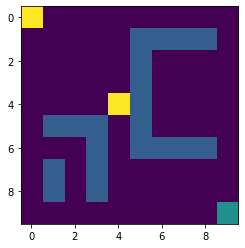

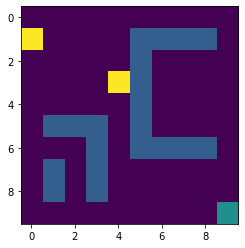

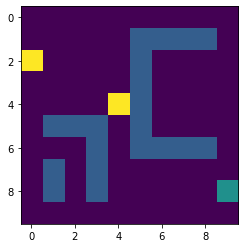

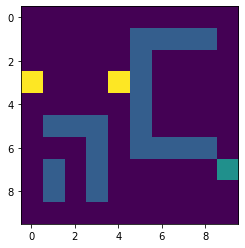

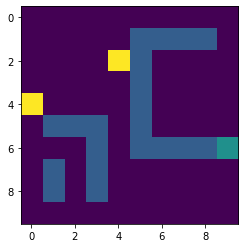

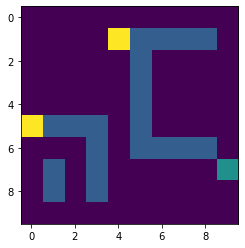

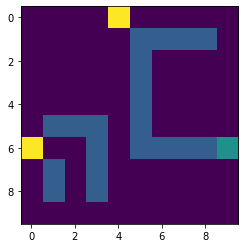

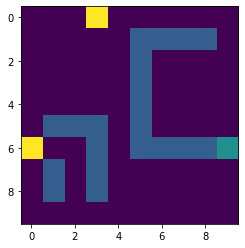

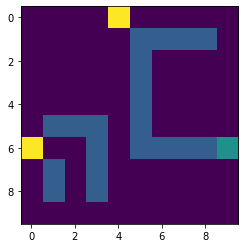

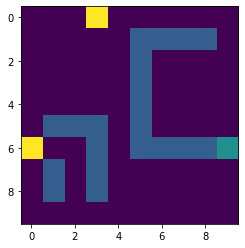

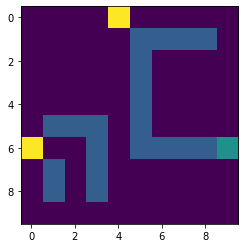

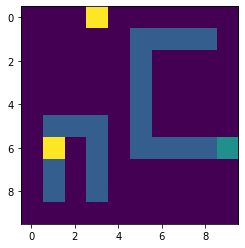

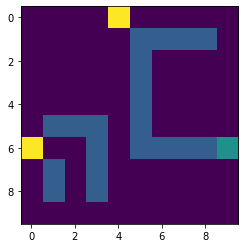

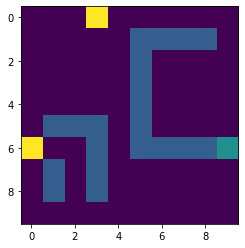

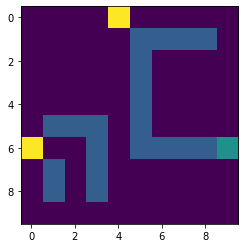

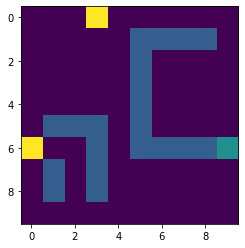

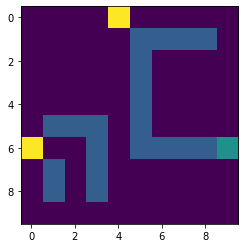

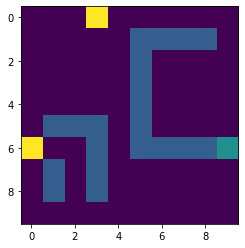

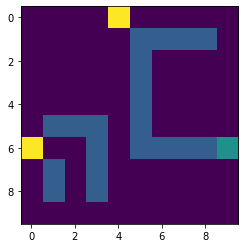

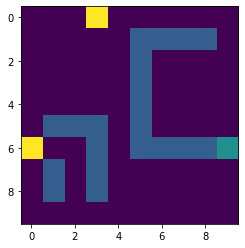

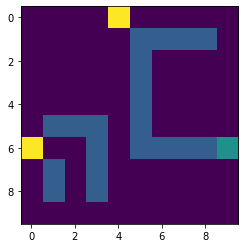

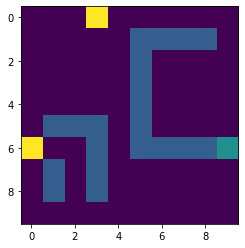

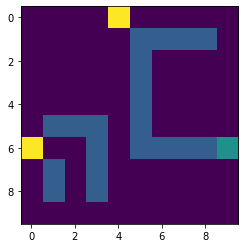

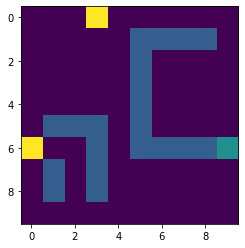

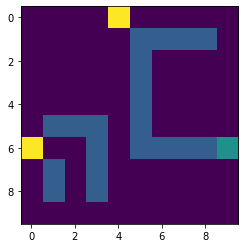

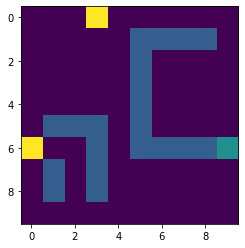

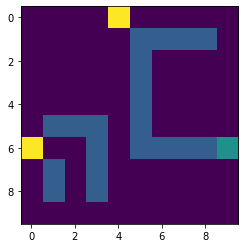

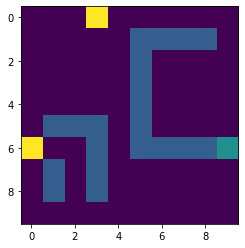

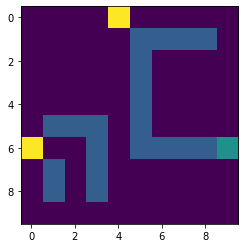

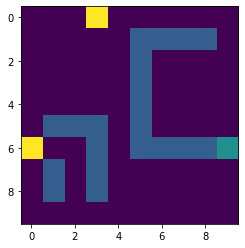

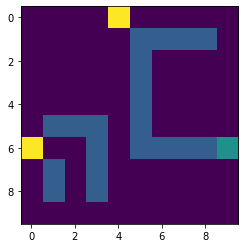

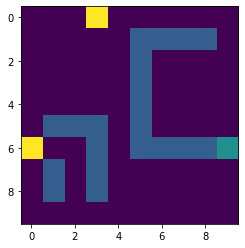

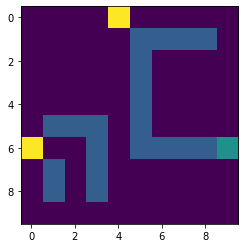

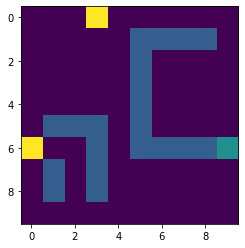

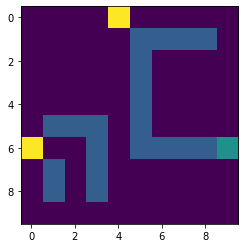

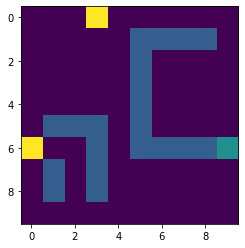

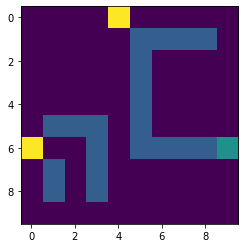

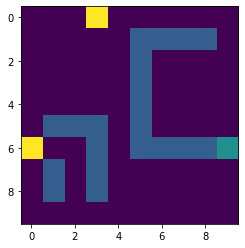

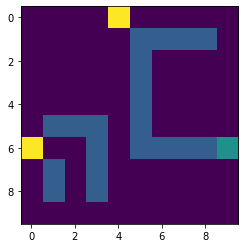

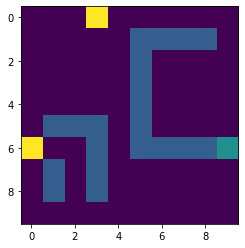

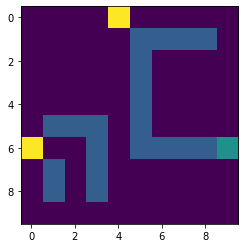

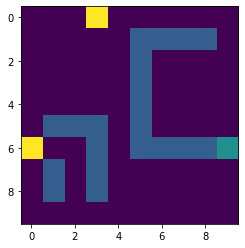

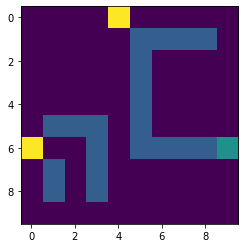

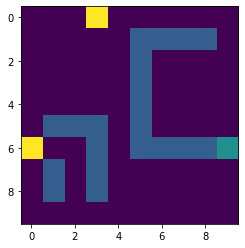

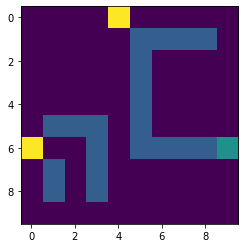

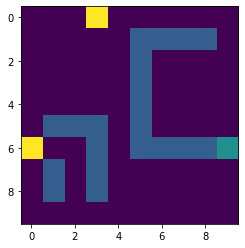

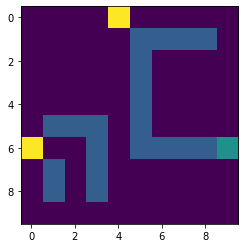

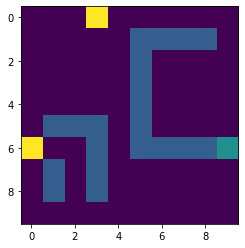

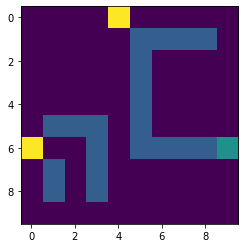

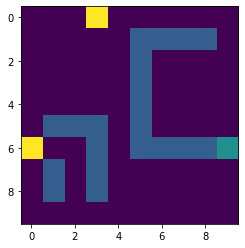

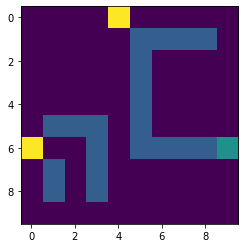

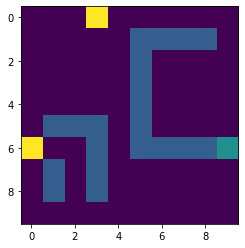

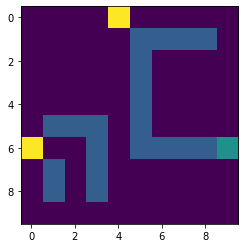

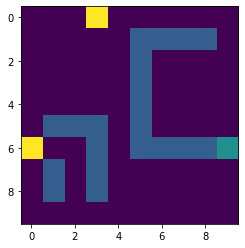

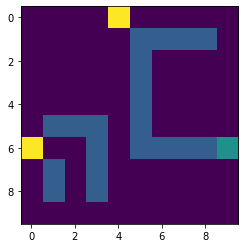

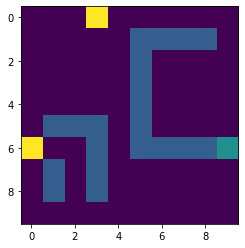

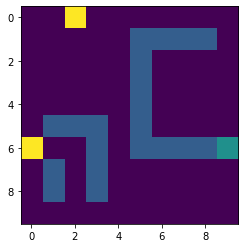

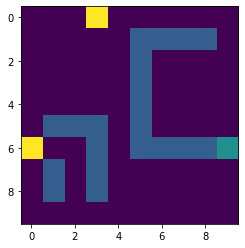

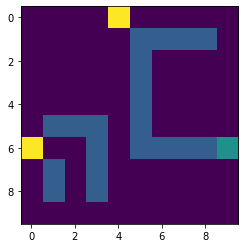

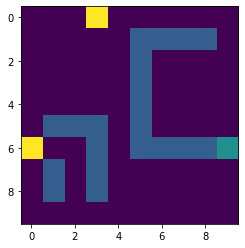

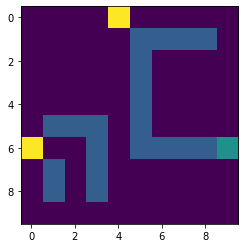

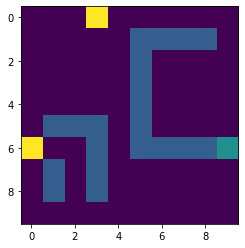

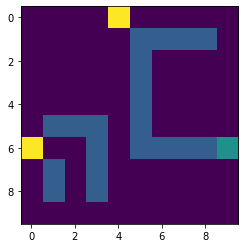

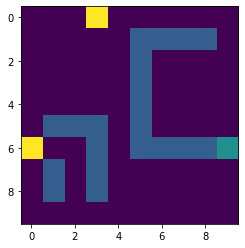

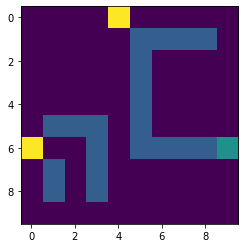

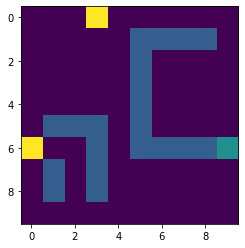

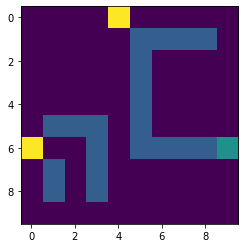

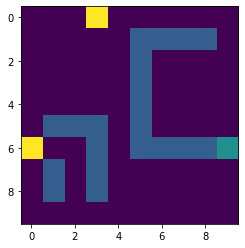

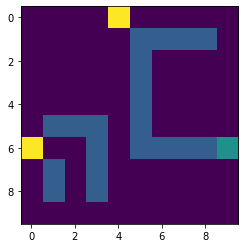

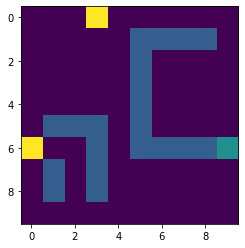

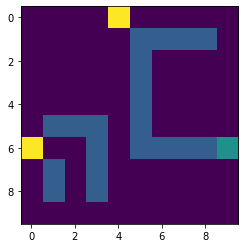

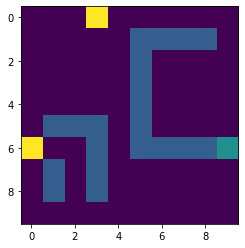

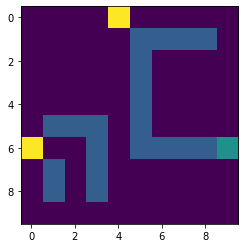

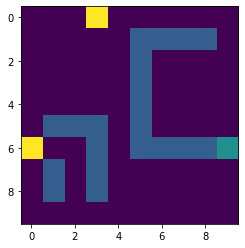

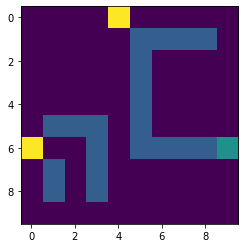

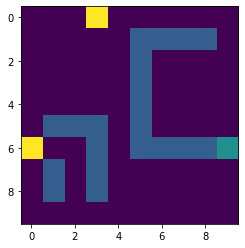

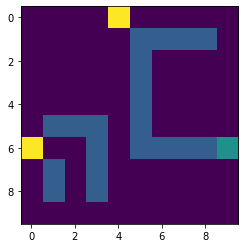

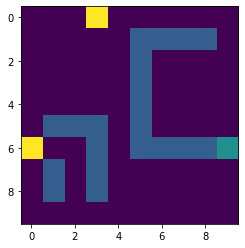

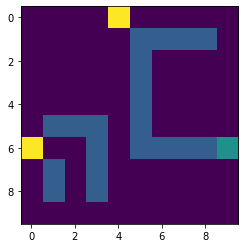

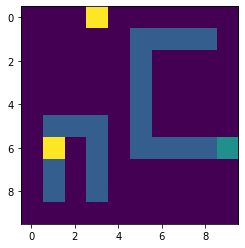

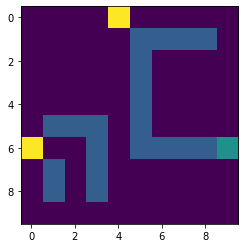

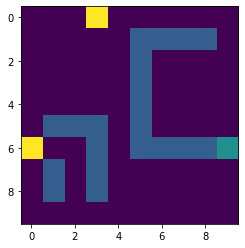

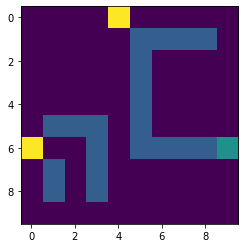

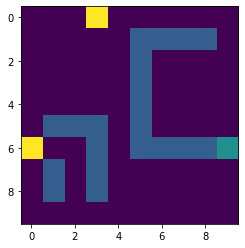

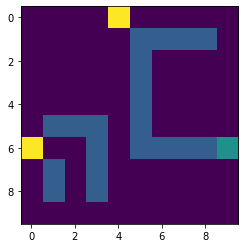

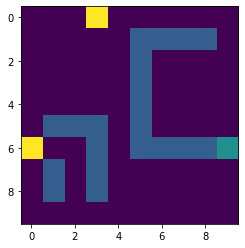

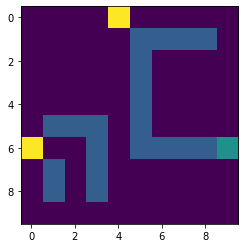

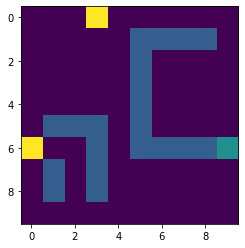

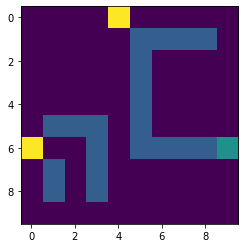

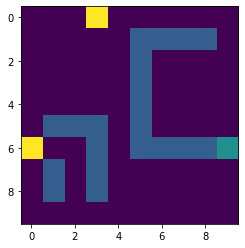

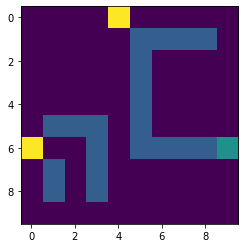

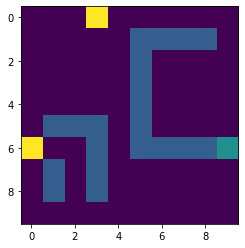

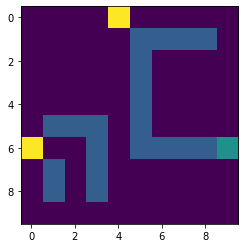

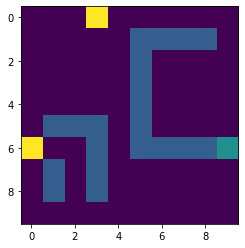

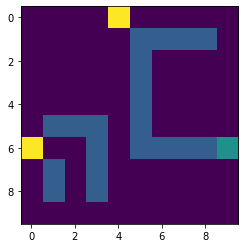

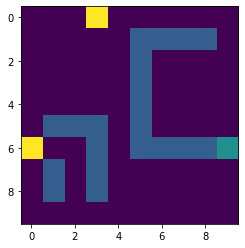

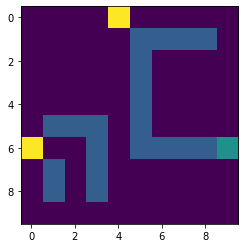

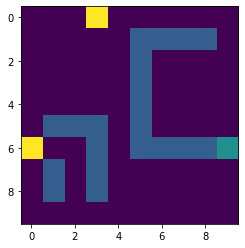

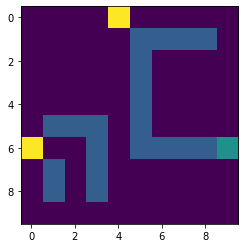

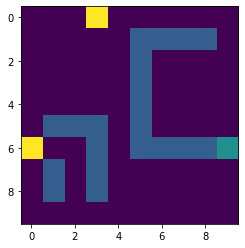

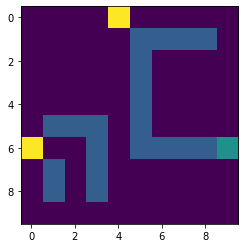

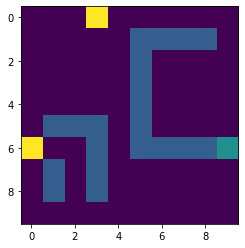

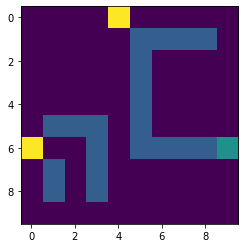

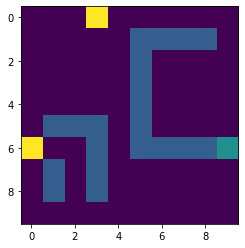

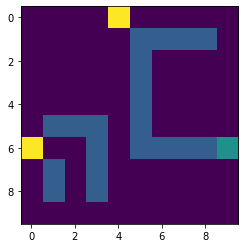

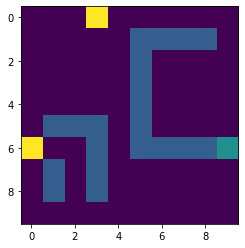

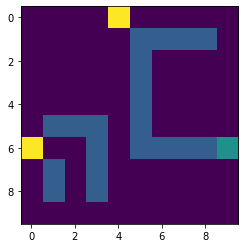

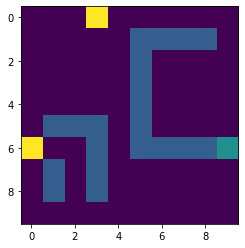

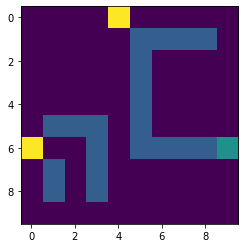

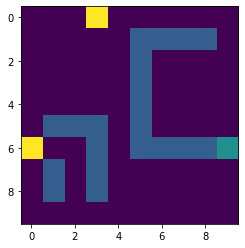

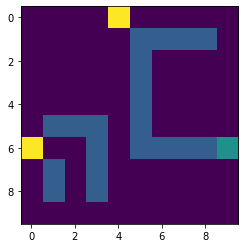

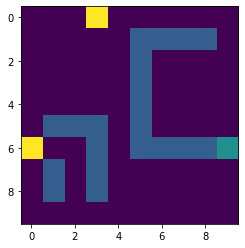

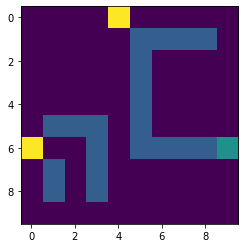

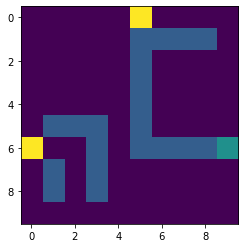

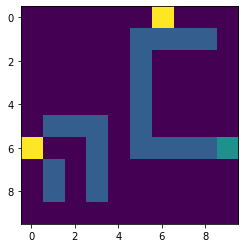

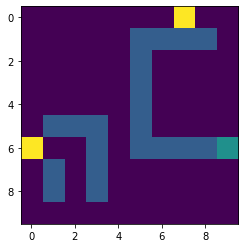

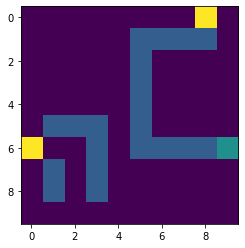

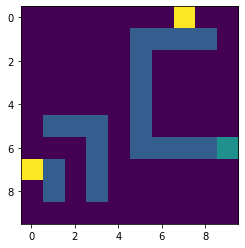

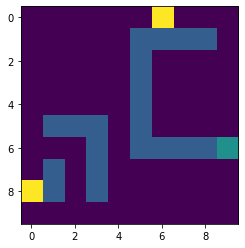

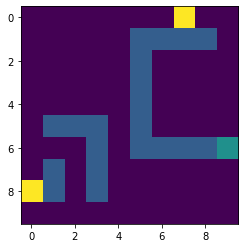

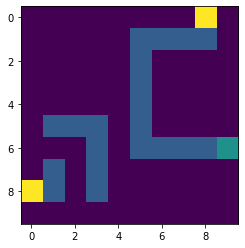

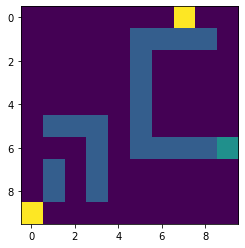

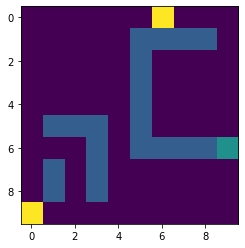

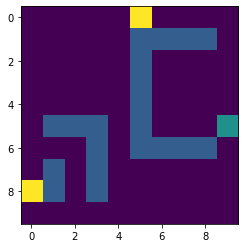

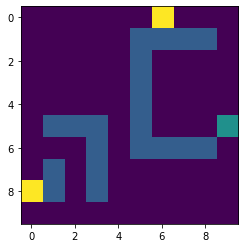

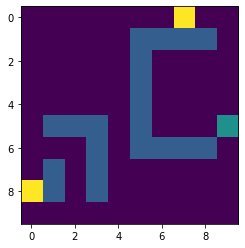

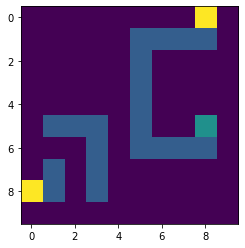

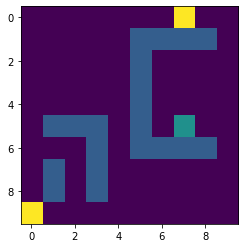

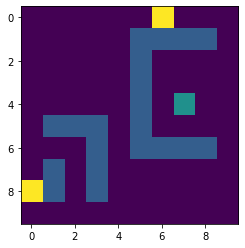

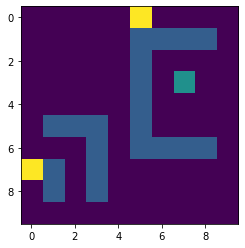

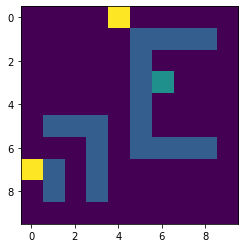

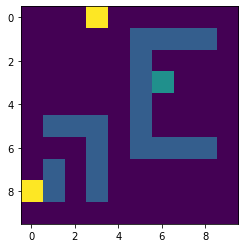

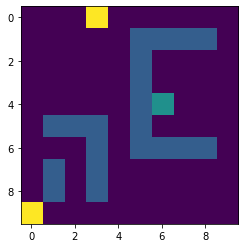

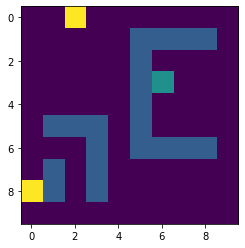

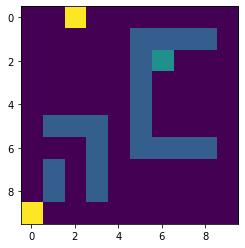

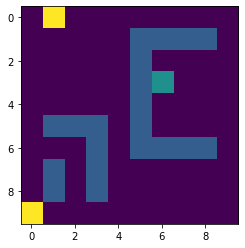

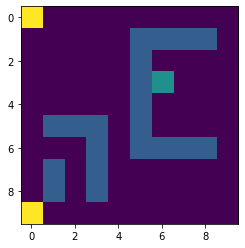

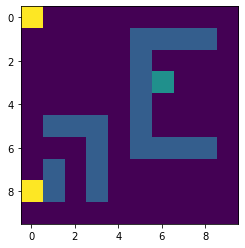

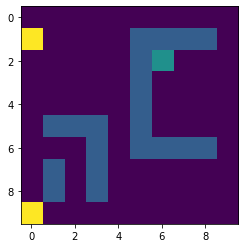

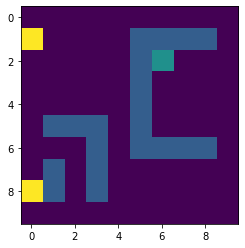

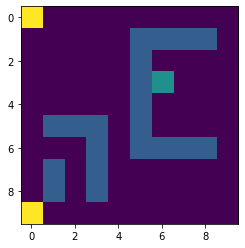

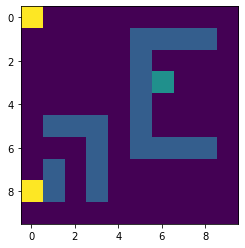

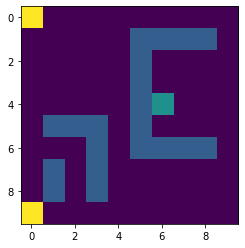

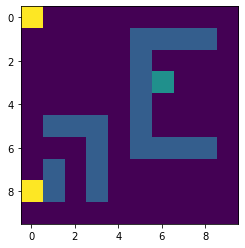

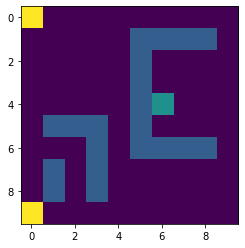

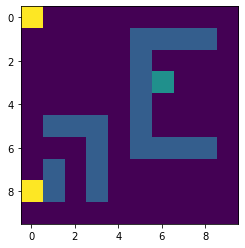

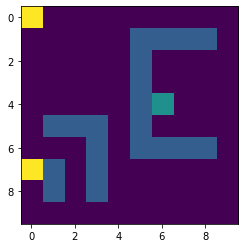

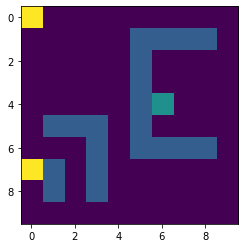

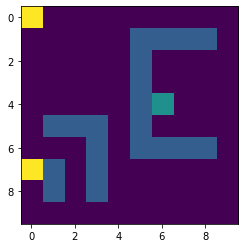

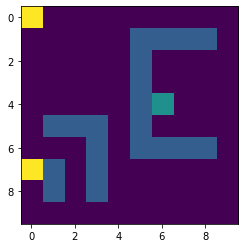

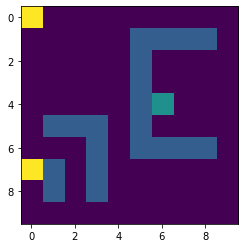

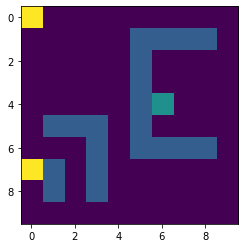

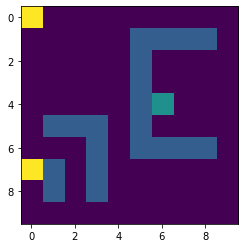

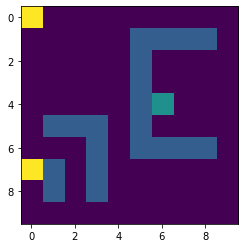

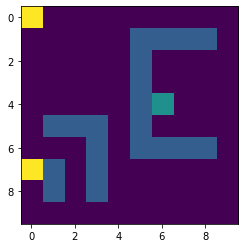

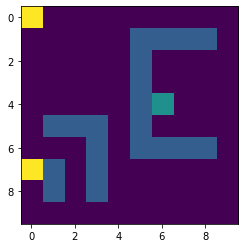

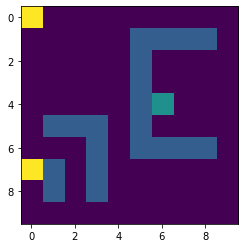

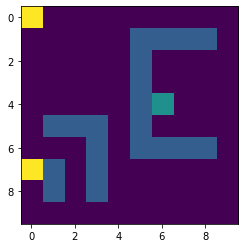

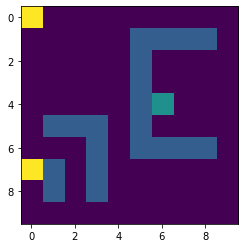

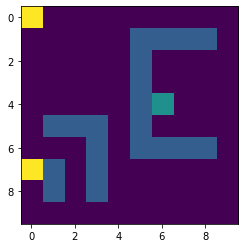

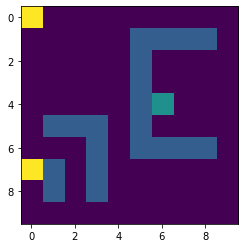

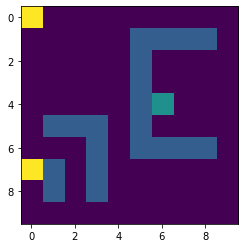

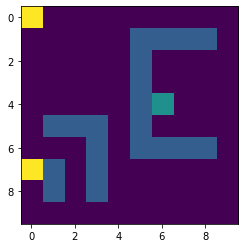

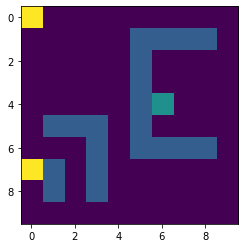

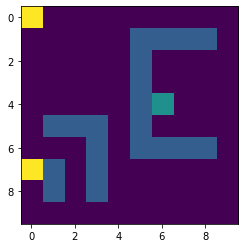

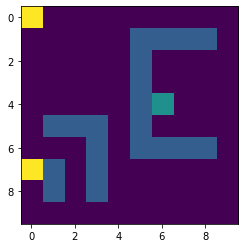

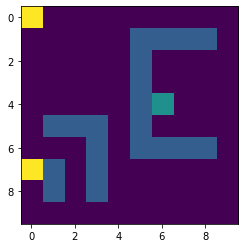

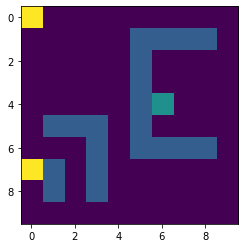

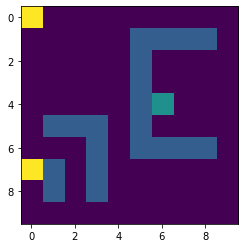

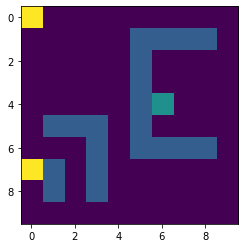

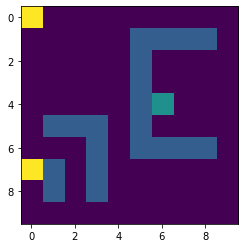

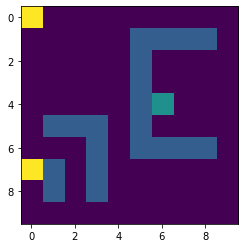

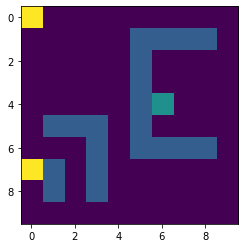

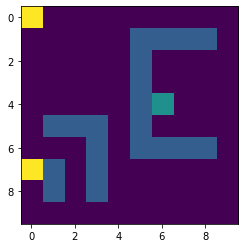

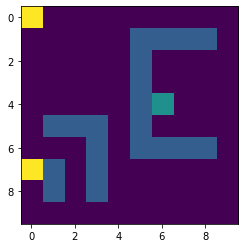

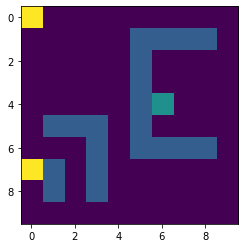

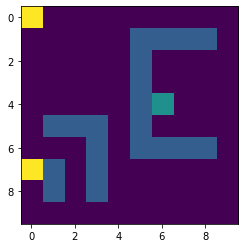

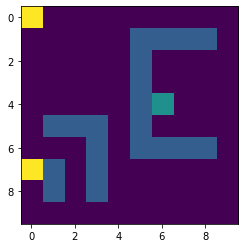

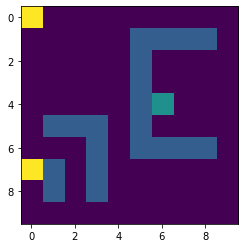

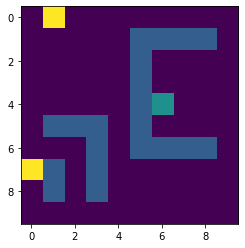

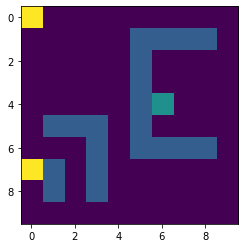

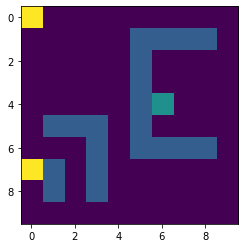

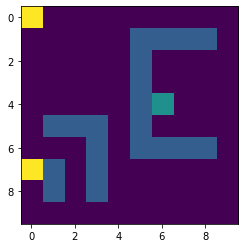

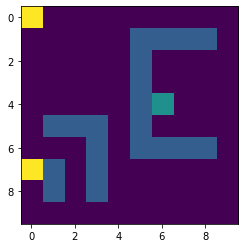

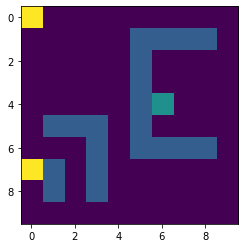

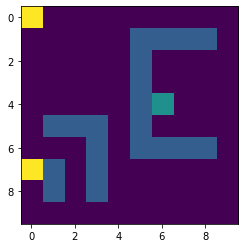

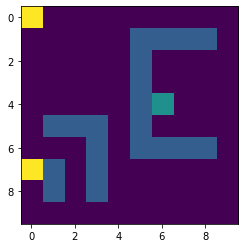

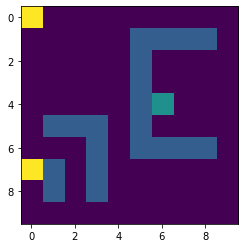

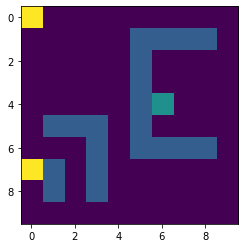

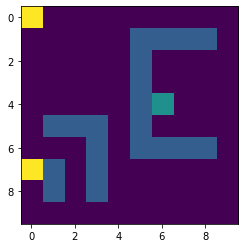

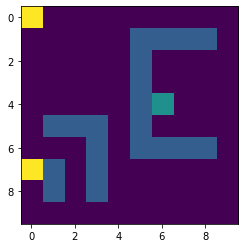

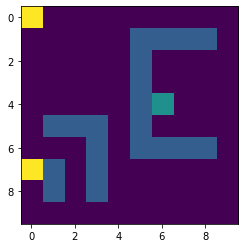

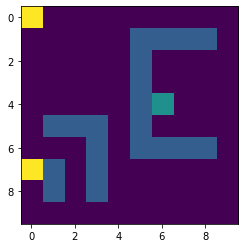

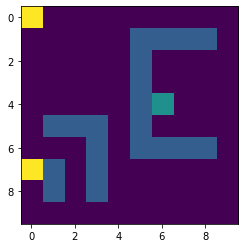

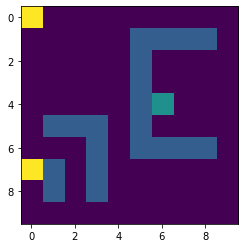

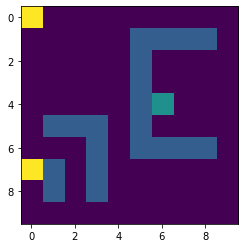

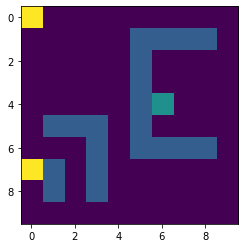

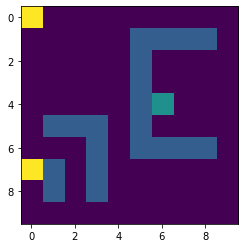

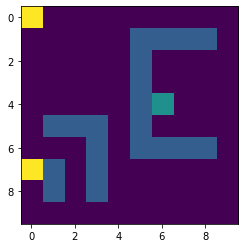

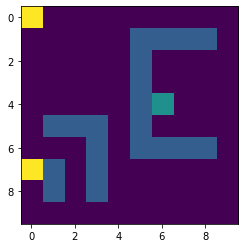

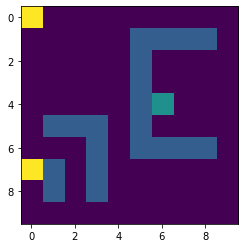

Reward: 200


In [11]:
#Test
env2 = GridStochasticEnvironment(gym.Env)
test1(env2, agent1)

##Plot

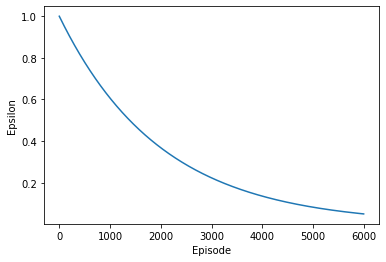

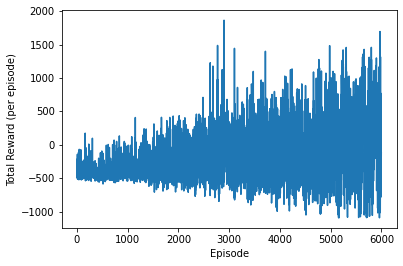

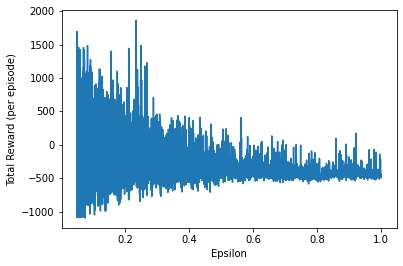

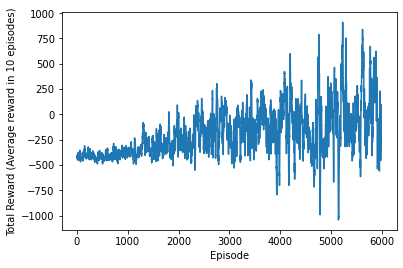

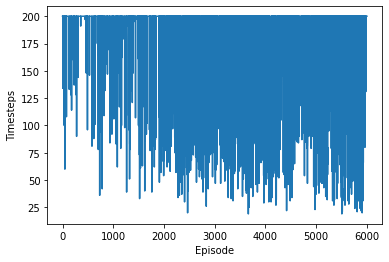

In [12]:
plotEpsilon(epsilons1)
plotRewards(total_rewards1)
plot1(epsilons1, total_rewards1)
plotAverageReward(total_rewards1)
plotTimesteps(timesteps1)

In [13]:
import pickle
data = []
data.append(total_rewards1)
output = open('data22.pkl', 'wb')
pickle.dump(data,output)